<a href="https://colab.research.google.com/github/IronsNelson/EllipticPlusPlus/blob/main/BITCOIN_TRANSACTIONS_ANALYSIS_def.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI for Security Project: Bitcoin transactions

*Dataset:* https://github.com/git-disl/EllipticPlusPlus

Group members:
*   Mariachiara Alba
*   Riccardo Ferri
*   Cecilia Prosperi



## Table of Contents

1. [Import Section](#Import-Section)  
2. [Global Variables and settings](#Global-Variables-and-settings)  
3. [Data Uploading](#Data-Uploading)  
4. [Dataset Summary Statistics](#Dataset-Summary-Statistics)
5. [Feature Dictionary](#Feature-Dictionary)  
6. [Data Visualization](#Data-Visualization)    
7. [Common functions](#Common-functions)  
8. [Supervised Learning](#Supervised-Learning)  
   - [Model Analysis](#Model-Analysis)  
9. [Linear Models](#Linear-Models)  
   - [Naive Bayes](#Naive-Bayes)  
   - [Logistic Regression](#Logistic-Regression)  
   - [Support Vector Machines](#Support-Vector-Machines)  
10. [Non-Linear Models](#Non-Linear-Models)  
    - [k-Nearest Neighbours](#k-Nearest-Neighbours)
    - [Decision Trees](#Decision-Trees)
    - [Kernelized Support Vector Machines](#Kernelized-Support-Vector-Machines)
    - [Neural Networks](#Neural-Networks)  
          - [Version 1](#Version-1)
          - [Version 2](#Version-2)
    - [Ensemble Learning](#Ensemble-Learning)  
          - [Voting Classifiers](#Voting-Classifiers)
          - [Bagging and Pasting](#Bagging-and-Pasting)
          - [Random Forests](#Random-Forests)
          - [Boosting](#Boosting)  
              - [AdaBoost](#AdaBoost)
              - [Gradient Boosting](#Gradient-Boosting)
              - [XGBoost](#XGBoost)  
11. [Unsupervised Learning](#Unsupervised-Learning)  
    - [Clustering](#Clustering)  
       - [K-Means](#K-Means)  
       - [t-SNE](#t-SNE)  
       - [Elbow Method K-Means](#Elbow-Method-K-Means)  
       - [K-Means Iterations](#K-Means-Iterations)  
       - [Accelerated K-Means](#Accelerated-K-Means)  
    - [Hierarchical Clustering](#Hierarchical-Clustering)  
       - [Homogeneity](#Homogeneity)  
       - [Calinski-Harabasz Index](#Calinski-Harabasz-Index)  
    - [Density-based Clustering](#Density-based-Clustering)  
       - [Homogeneity](#Homogeneity-1)  
       - [Calinski-Harabasz Index](#Calinski-Harabasz-Index-1)  
12. [Anomaly Detection](#Anomaly-Detection)  
13. Deep Learning Techniques
    * LSTM
    * CNN
14. [Alternative Dataset Analysis](#Alternative-Dataset-Analysis)


## Import Section

Built-in Libraries

In [ ]:
import random
import os
import time
import math
import warnings

Data Manipulation and Analysis

In [ ]:
import pandas as pd
import numpy as np

Statistical Tools

In [ ]:
from scipy.stats import uniform, randint

Machine Learning Libraries

In [ ]:
from sklearn.naive_bayes import (
    GaussianNB,
    MultinomialNB,
    BernoulliNB,
    ComplementNB
)
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    KFold
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    VotingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    GradientBoostingRegressor
)
from sklearn.tree import (DecisionTreeClassifier,
                          DecisionTreeRegressor)
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.exceptions import ConvergenceWarning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE

!pip install -q xgboost
from xgboost import XGBClassifier

!pip install -q lime
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Evaluation Metrics

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    average_precision_score,
    roc_curve,
    roc_auc_score,
    classification_report,
    mean_squared_error,
    log_loss,
    homogeneity_score,
    completeness_score,
    v_measure_score,
    calinski_harabasz_score,
    silhouette_score,
    make_scorer
)
from sklearn.calibration import CalibrationDisplay

Deep Learning

In [ ]:
!pip install -q tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from keras.utils import plot_model
from tensorflow.keras.callbacks import TensorBoard

Metrics for Imbalanced Datasets

In [ ]:
!pip install -q imblearn
from imblearn.metrics import specificity_score
from imblearn.over_sampling import SMOTE

Libraries for data visualization

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
import seaborn as sns
from scipy.spatial import Voronoi, voronoi_plot_2d
from IPython.display import Image
import plotly.express as px
import networkx as nx
import plotly.graph_objects as go



Other Import

In [ ]:
import warnings
from tabulate import tabulate
import multiprocessing

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import plot_tree

## Global Variables and settings


In [ ]:
RESULTS={}
# Format Modelname_version:(accuracy,precision,recall,specificity,)

# random configuration
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# downsampling, set True to run the nootebook with a subset of the dataset
DOWNSAMPLE = False

# local env. set True if you want to execute the notebook locally
# and manually load the csv. NB: this is usually required if you run
# the notebook locally on Windows since wget won't work.
LOCAL_EXEC = False

# Set this variable to true if you want to open tensorboard for NN visualization
TENSORBOARD = False

# used for printing metrics
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "Specificity": specificity_score,
    "F1 Score": f1_score
}

# print with colors codes
RED = "\033[31m"
GREEN = "\033[32m"
CYAN = "\033[96m"
PURPLE = "\033[95m"
RESET = "\033[0m"


colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:cyan', 'tab:purple', 'tab:gray', 'tab:olive']
warnings.filterwarnings("ignore")

In [ ]:
class ModelResult:
    """
    A class to represent the results of our machine learning models.

    """

    def __init__(self, name, accuracy, precision, recall, specificity,f1_score, roc, auc):
        self.name = name
        self.accuracy = accuracy
        self.precision = precision
        self.recall = recall
        self.specificity = specificity
        self.f1_score = f1_score
        self.roc = roc
        self.auc = auc

        # roc is a tuple made by:
        #  -fpr: 2d array of false positive rates
        #  -tpr: 2d true positive rates
        #  -thresholds: The decision thresholds corresponding to each pair of FPR and TPR


    @classmethod
    def from_array(cls, name, metrics, roc, auc):
        # Alternative constructor to create an instance of ModelMetrics using an array of metrics.
        # usage: model = ModelMetrics.from_array("Model_1", metrics_array, roc_tuple, auc_value)
        accuracy, precision, recall, specificity, f1_score = metrics
        return cls(name, accuracy, precision, recall, specificity, f1_score, roc, auc)


    def __repr__(self):
        return (f"ModelResult(name={self.name}, accuracy={self.accuracy:.8f}, "
                f"precision={self.precision:.8f}, recall={self.recall:.8f}, "
                f"specificity={self.specificity:.8f}, f1_score={self.f1_score:.8f}, "
                f"auc={self.auc:.8f}"
                )

    def get_summary(self):
        return {
            "accuracy": self.accuracy,
            "precision": self.precision,
            "recall": self.recall,
            "specificity": self.specificity,
            "f1_score": self.f1_score,
            "roc": self.roc,
            "auc": self.auc

        }

    def get_summary_2(self):
      return [self.name, self.accuracy, self.precision,self.recall, self.specificity, self.specificity]


    def get_fpr_tpr(self):
        return self.roc[0],self.roc[1]

METRICS = ['accuracy', 'precision', 'recall', 'specificity',  'f1_score']
#used for dynamically convert to attr. for comparison during result analysis

MODELS_RESULTS = []
#will store the objects of class ModelResult

# Data Uploading

In order to perform the analysis are required:
- **features.csv**: contains transaction features;
- **edgelist.csv**: contains connections between transactions;
- **classes.csv:** contains labels (licit/illicit/unknown).

This cell mounts your Google Drive in Colab, extracts the Elliptic dataset ZIP from `MyDrive` into the runtime, automatically locates the three CSV files inside the extracted folders, and loads them into pandas as `txs_features_df`, `txs_classes_df`, and `txs_edgelist_df`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

zip_path = '/content/drive/MyDrive/datasets/Elliptic.zip'  # <-- cambia percorso se serve
!mkdir -p /content/dataset
!unzip -q "{zip_path}" -d /content/dataset

import os, glob, pandas as pd
csv_map = {os.path.basename(p): p for p in glob.glob('/content/dataset/**/*.csv', recursive=True)}
features_path = csv_map['txs_features.csv']
classes_path  = csv_map['txs_classes.csv']
edgelist_path = csv_map['txs_edgelist.csv']

txs_features_df = pd.read_csv(features_path)
txs_classes_df  = pd.read_csv(classes_path)
txs_edgelist_df = pd.read_csv(edgelist_path)

Mounted at /content/drive


In [ ]:
import os

zip_file_path = '/content/drive/MyDrive/datasets/Elliptic.zip'
if os.path.exists(zip_file_path):
    print(f"The file {zip_file_path} exists.")
else:
    print(f"The file {zip_file_path} DOES NOT exist. Please ensure it is present in your Google Drive.")

The file /content/drive/MyDrive/datasets/Elliptic.zip exists.


**Sanity checks & column names:**

It standardizes a DataFrame’s columns after loading. If the first column name is missing or different from `expected_first`, it renames that column to `expected_first` (e.g., `txId`) and renames all remaining columns to sequential `prefix1`, `prefix2`, …, returning a cleaned copy with a consistent schema.


In [ ]:
def ensure_columns(df, expected_first, prefix):
    if isinstance(df.columns[0], (int, np.integer)) or df.columns[0] != expected_first:
        cols = df.shape[1]
        new_cols = [expected_first] + [f"{prefix}{i}" for i in range(1, cols)]
        df = df.copy()
        df.columns = new_cols
    return df

This code standardizes the column names of the `txs_features_df`, `txs_classes_df`, and `txs_edgelist_df` DataFrames. It renames the first column to 'txId' (or 'txId1'/'txId2' for the edgelist) and subsequent columns to a generic prefix followed by an index, ensuring consistency for further analysis.

In [ ]:
txs_features_df = ensure_columns(txs_features_df, "txId", "f")
txs_classes_df  = ensure_columns(txs_classes_df,  "txId", "tmp")
if "class" not in txs_classes_df.columns:
    # assume second column is target
    txs_classes_df = txs_classes_df.rename(columns={txs_classes_df.columns[1]: "class"})

# edgelist: 2 columns of endpoints
if txs_edgelist_df.shape[1] >= 2:
    if {"txId1","txId2"}.issubset(txs_edgelist_df.columns) is False:
        txs_edgelist_df = txs_edgelist_df.copy()
        txs_edgelist_df.columns = ["txId1","txId2"] + list(txs_edgelist_df.columns[2:])


**Downsampling**:

This block performs a size-aware, consistent downsampling and then prepares the analysis table.
If the features table has more than 60,000 rows, it randomly samples 60k `txId`s (seed=42) and filters features, classes, and the edgelist to that subset—keeping only edges whose both endpoints are in the sample—then prints the new sizes. Next, it left-joins features with labels on `txId` to create `df` and sets `target_col = "class"`.

Purpose: speed up analysis while preserving label and graph consistency.


In [ ]:
MAX_ROWS = 60000
rng_seed = 42
n_total = len(txs_features_df)
do_downsample = n_total > MAX_ROWS
if do_downsample:
    sample_ids = set(txs_features_df["txId"].sample(n=MAX_ROWS, random_state=rng_seed))
    txs_features_df = txs_features_df[txs_features_df["txId"].isin(sample_ids)].reset_index(drop=True)
    txs_classes_df  = txs_classes_df[txs_classes_df["txId"].isin(sample_ids)].reset_index(drop=True)
    txs_edgelist_df = txs_edgelist_df[
        txs_edgelist_df["txId1"].isin(sample_ids) & txs_edgelist_df["txId2"].isin(sample_ids)
    ].reset_index(drop=True)

print(f"[INFO] Features: {len(txs_features_df):,} rows, {txs_features_df.shape[1]} cols "
      f"(downsample: {do_downsample})")
print(f"[INFO] Classes : {len(txs_classes_df):,} rows, {txs_classes_df.shape[1]} cols")
print(f"[INFO] Edges   : {len(txs_edgelist_df):,} rows, {txs_edgelist_df.shape[1]} cols\n")

#Let-join for df
df = txs_features_df.merge(txs_classes_df, on="txId", how="left")
target_col = "class" if "class" in df.columns else None

[INFO] Features: 60,000 rows, 184 cols (downsample: True)
[INFO] Classes : 60,000 rows, 2 cols
[INFO] Edges   : 20,209 rows, 2 cols



In [ ]:
from IPython.display import Markdown, display

COLUMN_GUIDE = """
**Column guide (Elliptic++ Transactions Dataset)**

- `txId`: internal transaction identifier (not the on-chain hash).
- `Time step`: temporal bucket (1–49) used for time-aware analysis/splits.
- `Local_feature_1 … Local_feature_k`: anonymized, standardized transaction-level features; exact per-index meanings are not publicly disclosed by Elliptic.
- `in_BTC_*`: inbound-neighbor BTC aggregates (min, max, mean, median, total).
- `out_BTC_*`: outbound-neighbor BTC aggregates (min, max, mean, median, total).
- `class`: 1 = illicit, 2 = licit, 3 = unknown.
"""

display(Markdown(COLUMN_GUIDE))



**Column guide (Elliptic++ Transactions Dataset)**

- `txId`: internal transaction identifier (not the on-chain hash).
- `Time step`: temporal bucket (1–49) used for time-aware analysis/splits.
- `Local_feature_1 … Local_feature_k`: anonymized, standardized transaction-level features; exact per-index meanings are not publicly disclosed by Elliptic.
- `in_BTC_*`: inbound-neighbor BTC aggregates (min, max, mean, median, total).
- `out_BTC_*`: outbound-neighbor BTC aggregates (min, max, mean, median, total).
- `class`: 1 = illicit, 2 = licit, 3 = unknown.


In [ ]:
display(df.head())

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,3321,1,-0.169615,-0.184668,-1.201369,-0.12197,-0.043875,-0.113002,-0.061584,-0.160199,...,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972,3
1,89273,1,5.202107,-0.210553,-1.756361,-0.12197,260.090707,-0.113002,-0.061584,5.335864,...,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680,2
2,223263,1,-0.138618,-0.184668,-1.201369,-0.12197,-0.043875,-0.113002,-0.061584,-0.128486,...,5.448193,5.448193,5.448193,5.448193,9.269344e-02,5.355399,2.724046,2.724046,5.448093,3
3,293323,1,-0.172726,-0.184668,-1.201369,-0.12197,-0.043875,-0.113002,-0.061584,-0.163383,...,0.040774,0.040774,0.040774,0.040774,9.480000e-04,0.039726,0.020337,0.020337,0.040674,2
4,293346,1,-0.138657,-0.184668,-1.201369,-0.12197,-0.043875,-0.113002,-0.061584,-0.128525,...,5.442104,5.442104,5.442104,5.442104,2.411762e+00,3.030242,2.721002,2.721002,5.442004,3


In [ ]:
#Data structure for an example transaction (txId = 272145560):
print("\ntxs_features.csv for txId = 272145560\n")
txs_features_df[txs_features_df['txId']==272145560]

print("\ntxs_classes.csv for txId = 272145560\n")
txs_classes_df[txs_classes_df['txId']==272145560]

print("\ntxs_edgelist.csv for txId = 272145560\n")
txs_edgelist_df[(txs_edgelist_df['txId1']==272145560) | (txs_edgelist_df['txId2']==272145560)]



txs_features.csv for txId = 272145560


txs_classes.csv for txId = 272145560


txs_edgelist.csv for txId = 272145560



,txId1,txId2


## Dataset Summary Statistics

For a start, the numbers of rows and columns in the dataset are printed.

In [ ]:
rows, cols = df.shape

print(f"Number of rows: {rows} \nNumber of columns: {cols}")

Number of rows: 60000 
Number of columns: 185


Names and data types of the columns are also displayed.

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 185 columns):
 #    Column                Dtype  
---   ------                -----  
 0    txId                  int64  
 1    Time step             int64  
 2    Local_feature_1       float64
 3    Local_feature_2       float64
 4    Local_feature_3       float64
 5    Local_feature_4       float64
 6    Local_feature_5       float64
 7    Local_feature_6       float64
 8    Local_feature_7       float64
 9    Local_feature_8       float64
 10   Local_feature_9       float64
 11   Local_feature_10      float64
 12   Local_feature_11      float64
 13   Local_feature_12      float64
 14   Local_feature_13      float64
 15   Local_feature_14      float64
 16   Local_feature_15      float64
 17   Local_feature_16      float64
 18   Local_feature_17      float64
 19   Local_feature_18      float64
 20   Local_feature_19      float64
 21   Local_feature_20      float64
 22   Local_feature_21    

From this preview there are important takeways:

* Columns have only **2 different dtypes** (as shown also in the code-snippet below), namely 'int64', and 'float64': they are all numeric and ready  for analysis/modeling without conversions.

* **Loading & downsampling are OK:** `RangeIndex: 60000 entries` means the 60k sample was applied correctly (it matches `MAX_ROWS`).

* **Size:** there are 185 columns total. This includes `txId`, `Time step`, and the label `class`, with the rest being numeric features.

* **Good modeling signal:** numeric types + consistent naming → simpler merges and more straightforward training.


In [ ]:
# real features
n_features = df.shape[1] - 3  # txId, Time step, class
print("n_features:", n_features)

# ID duplicates
print("txId duplicates:", df['txId'].duplicated().sum())

# NA values
print("total NA:", int(df.isna().sum().sum()))

n_features: 182
txId duplicates: 0
total NA: 4607


*    Sample OK: 60,000 rows, the downsampling worked.

*    Usable features: 182 (excluding txId, Time step, class).

*    Unique IDs: duplicates on txId = 0 → safe merges/joins.

*    Very few missing values: 4,607 cells missing out of ~11.1M ≈ 0.04% overall (need to verify if concentrated in a few columns).

This table reports class proportions by Time step for the first buckets. The distribution is fairly stable (class 3 ≈ 0.73–0.80, class 2 ≈ 0.20–0.27, class 1 ≈ 0.001–0.004), so Time step carries little predictive signal and mainly reflects temporal metadata. Hence, it will not be considered as a feature in order to avoid period “shortcuts” and leakage.

In [ ]:
df.groupby('Time step')['class'].value_counts(normalize=True).unstack(fill_value=0).head()


class,1,2,3
Time step,,,
1,0.002204,0.267078,0.730718
2,0.003748,0.225637,0.770615
3,0.001024,0.199591,0.799386
4,0.004372,0.234853,0.760775
5,0.001911,0.267081,0.731008


In this cell:

*    Missing-value scan: computes the NA rate per column (na_rate) to see if nulls are concentrated in a few features.

*   Build a supervised dataset: keeps only labeled rows (class ∈ {1,2}); defines X by dropping txId, class, and Time step (to avoid temporal shortcuts), and defines y as a binary target (1 = illicit, 0 = licit).

*   Simple imputation: fills remaining nulls in X with each column’s median— appropriate since overall NA is tiny.

*   Handle class imbalance: computes class weights with compute_class_weight('balanced', ...); pass this dict to counter the 1:9+ skew between illicit and licit.

In [ ]:
# 1) NAs per column to check if they're concentrated
na_rate = (df.isna().mean()*100).sort_values(ascending=False)
display(na_rate.head(10))

# 2) Considering only class 1 and 2 (licit and illicit)
labeled = df[df['class'].isin([1,2])].copy()
X = labeled.drop(columns=['txId','class','Time step'])
y = (labeled['class'] == 1).astype(int)          # 1 = illicit, 0 = licit

# 3) if NAs are low, substitute each column with the median value
X = X.fillna(X.median(numeric_only=True))

# 4) Class weights for (class) imbalance
from sklearn.utils.class_weight import compute_class_weight
w = compute_class_weight('balanced', classes=np.array([0,1]), y=y)
class_weight = {0: w[0], 1: w[1]}
print(class_weight)

,0
in_BTC_mean,0.451667
in_BTC_median,0.451667
in_BTC_total,0.451667
out_BTC_min,0.451667
out_BTC_max,0.451667
out_BTC_mean,0.451667
out_BTC_median,0.451667
in_txs_degree,0.451667
total_BTC,0.451667
out_txs_degree,0.451667


{0: np.float64(0.5515560250264078), 1: np.float64(5.34909377462569)}


NA pattern is fine. Each neighbor-based feature (in_BTC_*, out_BTC_*, *_degree, total_BTC) has ~0.45% missing values, which is very low.

The identical rate across these columns means the same rows are missing—typically transactions with no inbound/outbound neighbors (so the aggregates aren’t defined).

In [ ]:
#Column types confirmation
column_types = {}
for column_type in df.dtypes:
    if column_type not in column_types.keys():
        column_types[column_type] = 1
    else:
        column_types[column_type] += 1

print("Column Types Summary:")
for col_type, count in column_types.items():
    print(f" - {col_type}: {count} columns")

Column Types Summary:
 - int64: 3 columns
 - float64: 182 columns


It seems that there are no categorical features. Despite that, we will treat small-cardinality integer columns as categorical (excluding txId).

In [ ]:
cat_cols=[]
for c in df.columns:
    if c not in ["txId", target_col] and pd.api.types.is_integer_dtype(df[c]):
        if df[c].nunique(dropna=True) <= max(10, 0.001 * len(df)):
            cat_cols.append(c)
cat_cols = sorted(set(cat_cols + ([target_col] if target_col else [])))
num_cols = [c for c in df.columns if c not in cat_cols and c not in ["txId"] and pd.api.types.is_numeric_dtype(df[c])]

print(f"- Categorical columns: {cat_cols}\n")

- Categorical columns: ['Time step', 'class']



In [ ]:
for categorical_feature in cat_cols:
    unique_values = df[categorical_feature].nunique()
    duplicates= rows - unique_values
    percentage_unique= unique_values/rows*100

    print(f"{categorical_feature}:\n unique values: {unique_values}\n duplicates: {duplicates}\n percentage of unique values: {percentage_unique:.2f}%\n")

Time step:
 unique values: 49
 duplicates: 59951
 percentage of unique values: 0.08%

class:
 unique values: 3
 duplicates: 59997
 percentage of unique values: 0.01%



Now the 10 most frequent values for each categorical feature ordered are reported.

In [ ]:
#Analysis of categorical
for i in cat_cols:
    category_counts = df[i].value_counts()
    print(f"Top 10 {i} by occurrence:")
    for value, count in category_counts.head(10).items():
        print(f" {value}: {count}")
    print("-" * 30)

Top 10 Time step by occurrence:
 1: 2269
 42: 2183
 5: 2093
 3: 1954
 10: 1913
 36: 1866
 7: 1801
 22: 1717
 45: 1673
 35: 1648
------------------------------
Top 10 class by occurrence:
 3: 46424
 2: 12307
 1: 1269
------------------------------


Analysis of Numeric Features

In this section numeric features are analyzed. First we tried to assess whether there are binary features. Eventually, they will be we subtracted from the numerical set and performed a study on it.

In [ ]:
binary_columns = [col for col in df.columns if df[col].isin([0, 1]).all()]

print("Columns containing only 0 and 1 values:\n")
for col in binary_columns:
    print(f"• {col}")

print(f"\n Binary feature number: {len(binary_columns)}")

Columns containing only 0 and 1 values:


 Binary feature number: 0


There are no binary features.

Summary statistics are computed (min/max, mean/median, standard deviation, etc.)

In [ ]:
numerical_df = df.select_dtypes(include=['number']) #select numeric feature (int64 and float64)

numerical_df.describe().transpose() #summary statistics about them

,count,mean,std,min,25%,50%,75%,max
txId,60000.0,1.705923e+08,1.103712e+08,2534.000000,8.418307e+07,1.586506e+08,2.454113e+08,4.032347e+08
Time step,60000.0,2.390050e+01,1.517400e+01,1.000000,9.000000e+00,2.300000e+01,3.800000e+01,4.900000e+01
Local_feature_1,60000.0,-1.240241e-03,1.032633e+00,-0.172982,-1.725343e-01,-1.692429e-01,-1.313126e-01,7.168197e+01
Local_feature_2,60000.0,-2.644513e-03,9.945046e-01,-0.210553,-1.790893e-01,-1.328975e-01,-5.524241e-02,7.359505e+01
Local_feature_3,60000.0,4.602533e-03,9.986104e-01,-1.756361,-1.201369e+00,4.636092e-01,1.018602e+00,2.683580e+00
...,...,...,...,...,...,...,...,...
out_BTC_max,59729.0,2.623714e+01,1.566720e+02,0.000027,5.830869e-02,5.000000e-01,5.787885e+00,1.131183e+04
out_BTC_mean,59729.0,1.157396e+01,6.130616e+01,0.000014,3.510462e-02,2.802830e-01,2.669976e+00,2.998404e+03
out_BTC_median,59729.0,1.104090e+01,5.905412e+01,0.000005,2.678066e-02,2.152238e-01,2.197126e+00,2.998404e+03
out_BTC_total,59729.0,2.734056e+01,1.640743e+02,0.000027,7.175161e-02,5.999730e-01,6.663852e+00,1.139186e+04


#### Analysis of Label Feature

Unique values in the `class` column are identified, counting their occurrences, and displaying both the unique values and their distribution.

In [ ]:
unique_labels = df['class'].unique()

print("Unique values in the 'class' column:")
print("-" * 36)

for label in unique_labels:
    print(f"• {label}")

print(f"\nTotal unique labels: {len(unique_labels)}\n")

print("\nClass Distribution:")
print("-" * 19)

class_counts = df['class'].value_counts()
print(class_counts)


Unique values in the 'class' column:
------------------------------------
• 3
• 2
• 1

Total unique labels: 3


Class Distribution:
-------------------
class
3    46424
2    12307
1     1269
Name: count, dtype: int64


As we expected since we are performing an analysis on leciticity o transactions there are three possible labels:

1 — Licit (Legitimate): no evidence of fraud, theft, ransomware, illicit markets, or sanctions exposure.

2 — Illicit: credibly linked to phishing/scams, stolen funds, ransomware, darknet markets, sanctioned entities, or similar abuse.

3 — Unknown: insufficient information or inconclusive indicators to assess licitness.

It is possible to notice a strong label unbalance.

For this phase we exclude Class 3 (Unknown) to compare only transactions with known labels—Class 1 = Illicit and Class 2 = Licit—and check whether their features differ materially.

In [ ]:
df_licit = df[df['class'] == 2]
df_licit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
txId,12307.0,1.703195e+08,1.096035e+08,2534.000000,8.500498e+07,1.575797e+08,2.452006e+08,4.029150e+08
Time step,12307.0,2.469343e+01,1.552479e+01,1.000000,9.000000e+00,2.400000e+01,4.000000e+01,4.900000e+01
Local_feature_1,12307.0,-4.063993e-02,7.941507e-01,-0.172982,-1.726815e-01,-1.701732e-01,-1.339837e-01,3.978676e+01
Local_feature_2,12307.0,1.897758e-01,1.609644e+00,-0.210553,-1.681956e-01,-1.070125e-01,2.241267e-02,4.188422e+01
Local_feature_3,12307.0,1.469473e-01,1.065170e+00,-1.756361,-1.201369e+00,4.636092e-01,1.018602e+00,2.683580e+00
...,...,...,...,...,...,...,...,...
out_BTC_max,12164.0,1.946593e+01,1.209794e+02,0.000027,3.900000e-02,3.500000e-01,5.092291e+00,6.292796e+03
out_BTC_mean,12164.0,6.411195e+00,2.647027e+01,0.000014,2.214784e-02,1.808596e-01,2.325415e+00,1.055867e+03
out_BTC_median,12164.0,5.594955e+00,2.357257e+01,0.000014,1.552361e-02,1.141875e-01,1.324111e+00,6.202117e+02
out_BTC_total,12164.0,2.118341e+01,1.266204e+02,0.000027,4.902535e-02,4.606153e-01,6.318224e+00,6.335202e+03


In [ ]:
df_illicit = df[df['class'] == 1]
df_illicit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
txId,1269.0,1.972108e+08,1.150291e+08,2.144054e+06,9.465413e+07,1.911080e+08,2.967128e+08,3.995553e+08
Time step,1269.0,2.541292e+01,1.129891e+01,1.000000e+00,1.600000e+01,2.500000e+01,3.400000e+01,4.900000e+01
Local_feature_1,1269.0,-1.657434e-01,2.220204e-02,-1.729788e-01,-1.727544e-01,-1.721863e-01,-1.700511e-01,1.424997e-01
Local_feature_2,1269.0,-1.363024e-02,2.129023e+00,-1.846676e-01,-1.587825e-01,-1.437071e-01,-1.070125e-01,7.359505e+01
Local_feature_3,1269.0,2.528082e-01,1.050267e+00,-1.201369e+00,-1.201369e+00,1.018602e+00,1.018602e+00,2.683580e+00
...,...,...,...,...,...,...,...,...
out_BTC_max,1269.0,1.109211e+00,3.442724e+00,6.111700e-04,3.506357e-02,1.193391e-01,4.588604e-01,5.000000e+01
out_BTC_mean,1269.0,6.598044e-01,1.810371e+00,6.111700e-04,3.221760e-02,1.043005e-01,3.688137e-01,2.500823e+01
out_BTC_median,1269.0,6.598044e-01,1.810371e+00,6.111700e-04,3.221760e-02,1.043005e-01,3.688137e-01,2.500823e+01
out_BTC_total,1269.0,1.147712e+00,3.519904e+00,6.111700e-04,3.618764e-02,1.262554e-01,4.647732e-01,5.001645e+01


The key takeaways:

*   Outbound BTC amounts are much smaller for Illicit.
out_BTC_mean ≈ 0.66 vs 6.41, out_BTC_median ≈ 0.037 vs 1.14, out_BTC_total ≈ 1.15 vs 21.18, and out_BTC_max max ≈ 50 vs 6,297. Licit txs have far heavier tails and larger typical outflows; Illicit txs tend to move small amounts.

*   Local features shift in opposite directions.
For Illicit, Local_feature_1 is more negative (≈ −0.166 vs −0.046), Local_feature_2 is near zero/slightly negative (≈ −0.014 vs +0.190), and Local_feature_3 is higher (≈ 0.253 vs 0.147). These standardized “local” descriptors likely capture structural/behavioral differences.

*  Time effect is minor.
Time step means are close (≈ 24.7 vs 25.4), so there’s no obvious temporal confound here.

*   A bit of missingness on neighbor aggregates.
Counts for some out_BTC_* fields in the licit table (e.g., 12,164 < 12,307) indicate small NA pockets—consistent with earlier ~0.45% NA; harmless after simple imputation.

# Data Visualization

In this section a more detailed analysis and visualization of the features in our dataset is conducted. The study focuses primarily on two key aspects:

Identifying the presence of outliers in specific features.
Exploring correlations between the features.
Given the large number of features in the dataset and the key insights already discussed in the previous chapter, we will take a closer look at a few columns that we find particularly interesting. For the remaining features, we will analyze them by grouping them together.

The barplot below illustrate the distribution of licit vs. illicit vs. unknown transactions, providing a clear visual representation of class proportions.

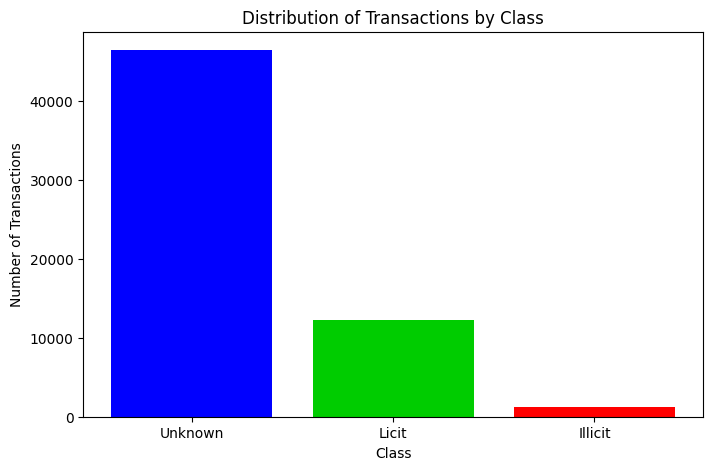

In [ ]:
labels_for_bar = ['Unknown', 'Licit', 'Illicit']

colors_for_bar = [
    '#0000FF',  # blu per Unknown
    '#00CC00',  # verde per Licit
    '#FF0000'   # rosso per Illicit
]

plt.figure(figsize=(8, 5))
plt.bar(labels_for_bar, class_counts.values, color=colors_for_bar)
plt.title('Distribution of Transactions by Class')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()


Number of transactions by time step:

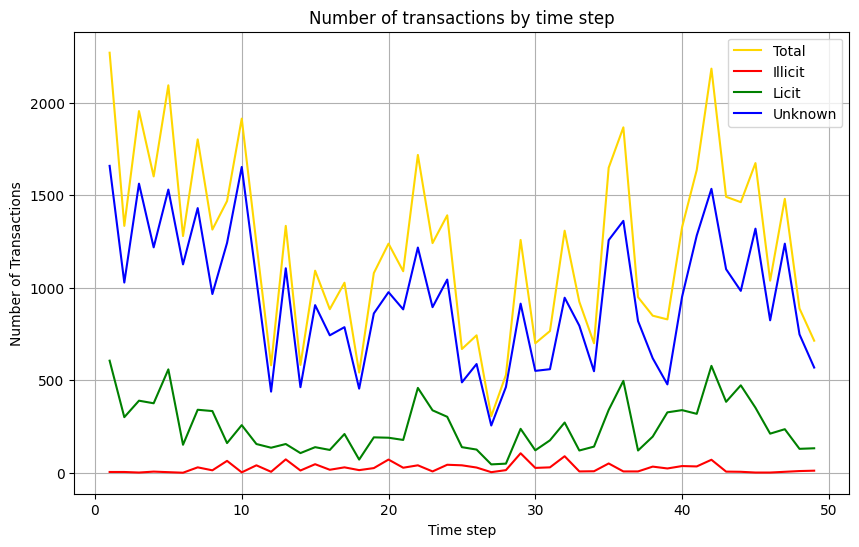

In [ ]:
total_txs = df.groupby('Time step').count()
illicit_txs = df[df['class']==1].groupby('Time step').count()
licit_txs = df[df['class']==2].groupby('Time step').count()
unknown_txs = df[df['class']==3].groupby('Time step').count()

plt.figure(figsize=(10, 6))
plt.title('Number of transactions by time step')

plt.plot(total_txs['txId'], label='Total', color='gold')    # total → gold
plt.plot(illicit_txs['txId'], label='Illicit', color='red') # illicit → red
plt.plot(licit_txs['txId'], label='Licit', color='green')   # licit → green
plt.plot(unknown_txs['txId'], label='Unknown', color='blue') # unknown → blue

plt.xlabel('Time step')
plt.ylabel('Number of Transactions')
plt.legend()
plt.grid(True)
plt.show()


Key insights
* Strong volatility in total transactions; sharp dips around ~26 and ~49.

* “Unknown” dominates and largely drives the total—rises and falls track closely.

* Licit volume is mid-range with **occasional spikes** (e.g., ~1, ~23, ~41).

* Illicit is sparse but bursty, with **notable peaks** around ~28,33.

* No clear seasonality; pattern looks event-driven.


Distribution of the number of transactions of each class by time step:

In [ ]:
import plotly.graph_objects as go

grouped_class = df[['Time step','class']].groupby(['Time step','class']).size().to_frame().reset_index()

timesteps = list(range(1,50))

fig = go.Figure(data = [
    go.Bar(
        name="Unknown (unlabelled)",
        x=timesteps,
        y=grouped_class[grouped_class['class'] == 3][0],
        marker=dict(color='blue', line=dict(color='blue', width=1))
    ),
    go.Bar(
        name="Licit (non-fraud)",
        x=timesteps,
        y=grouped_class[grouped_class['class'] == 2][0],
        marker=dict(color='green', line=dict(color='green', width=1))
    ),
    go.Bar(
        name="Illicit (fraud)",
        x=timesteps,
        y=grouped_class[grouped_class['class'] == 1][0],
        marker=dict(color='red', line=dict(color='red', width=1))
    )
])

fig.update_layout(
    barmode='stack',
    title='Numerical distribution of transactions by class and Time step',
    xaxis_title='Time step',
    yaxis_title='Number of Transactions'
)

fig.show()


**Feature analysis**

In [ ]:
unknown_count = grouped_class[grouped_class['class'] == 3]
illicit_count = grouped_class[grouped_class['class'] == 1]
licit_count = grouped_class[grouped_class['class'] == 2]

frames = [unknown_count, illicit_count, licit_count]
df_count_distribution = pd.concat(frames)
df_count_distribution.rename(columns={0: 'counts'}).sort_values('Time step')



,Time step,class,counts
2,1,3,1658
0,1,1,5
1,1,2,606
3,2,1,5
4,2,2,301
...,...,...,...
143,48,3,748
141,48,1,10
144,49,1,12
146,49,3,569



Some features show good correlation (Local_feature_53, Local_feature_55, Aggregate_feature_70, Aggregate_feature_39) while some features show bad correlation (Local_feature_70, Local_feature_15, Aggregate_feature_41, Aggregate_feature_42).
The results will be visualized with n line plots.


Features showing good correlation for classification and explainability : 



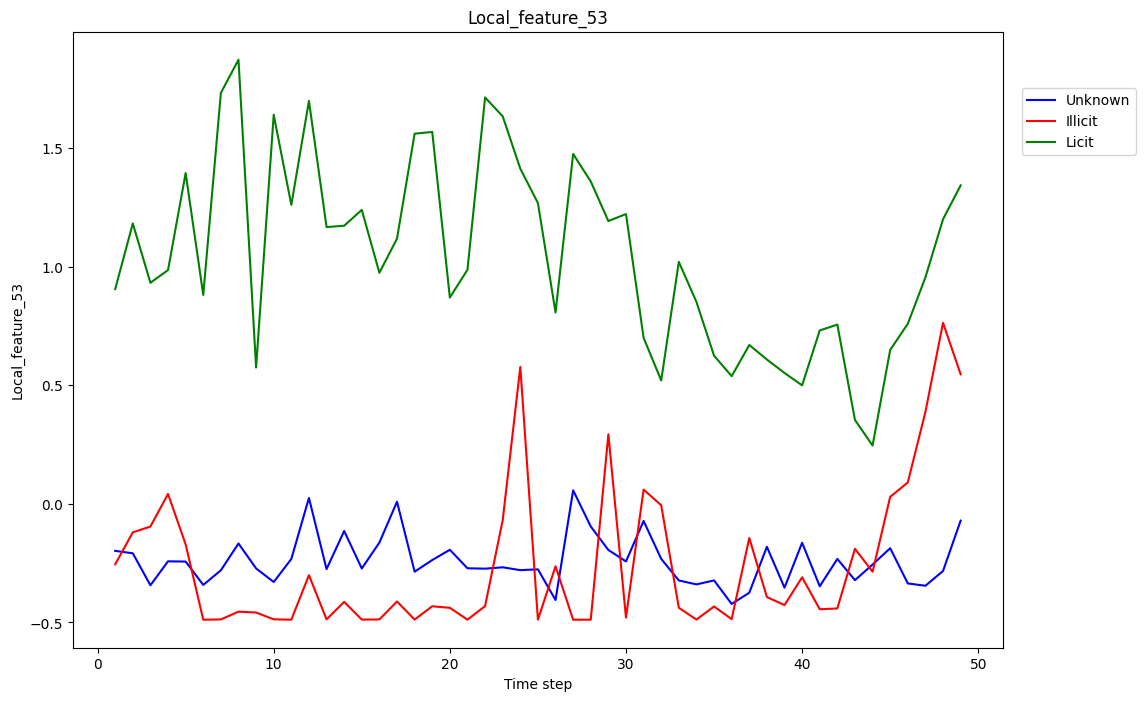

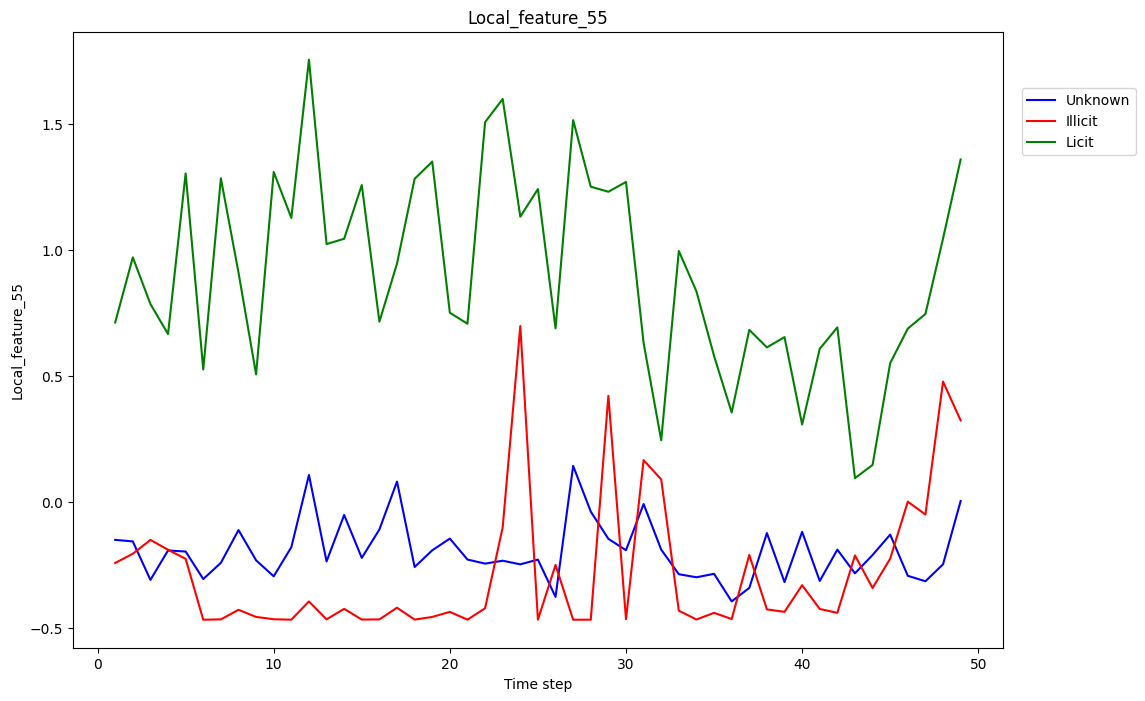

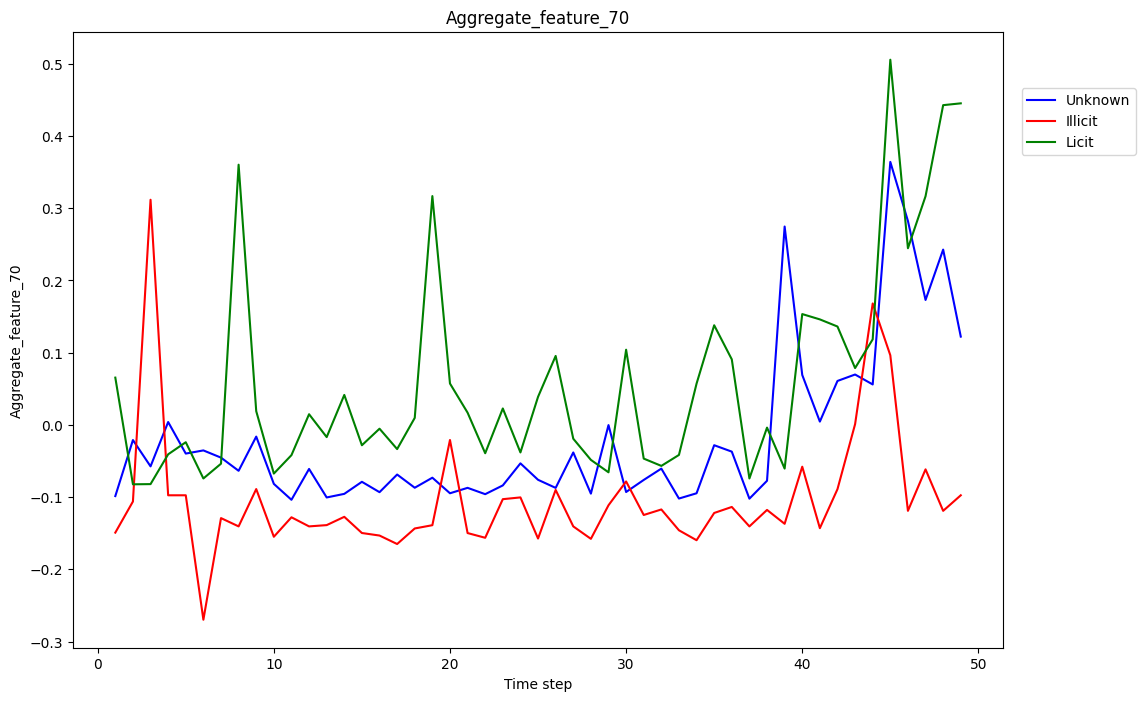

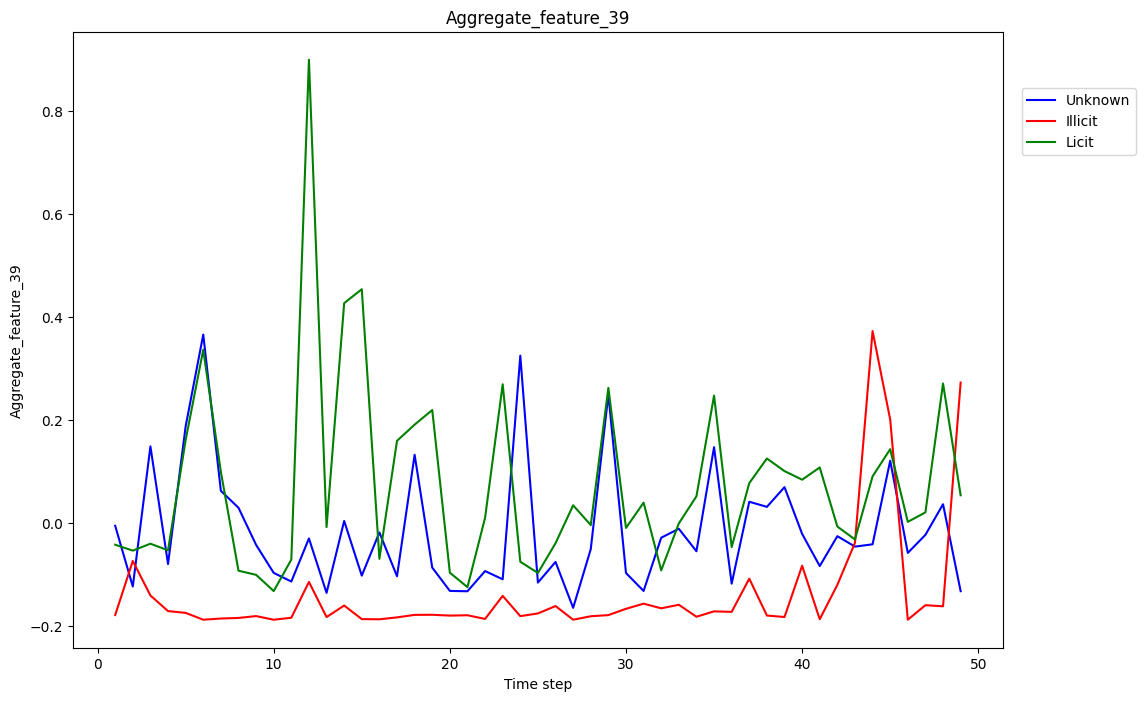

In [ ]:
print("\nFeatures showing good correlation for classification and explainability : \n")

good_correlation_features = ['Local_feature_53', 'Local_feature_55', 'Aggregate_feature_70', 'Aggregate_feature_39']

for feat in good_correlation_features:
    plt.figure(figsize=(12, 8))

    grouped = df.groupby(['Time step', 'class'])[feat].mean().reset_index()
    grouped.loc[grouped['class'] == 1, 'class'] = 'illicit'
    grouped.loc[grouped['class'] == 2, 'class'] = 'licit'
    grouped.loc[grouped['class'] == 3, 'class'] = 'unknown'

    # fixed colors
    sns.lineplot(x='Time step', y=feat, data=grouped[grouped['class']=='unknown'],
                 color='blue', label='Unknown')

    sns.lineplot(x='Time step', y=feat, data=grouped[grouped['class']=='illicit'],
                 color='red', label='Illicit')

    sns.lineplot(x='Time step', y=feat, data=grouped[grouped['class']=='licit'],
                 color='green', label='Licit')

    plt.legend(loc=(1.02, 0.8))
    plt.title(feat)
    plt.show()



Features showing bad correlation for classification and explainability : 



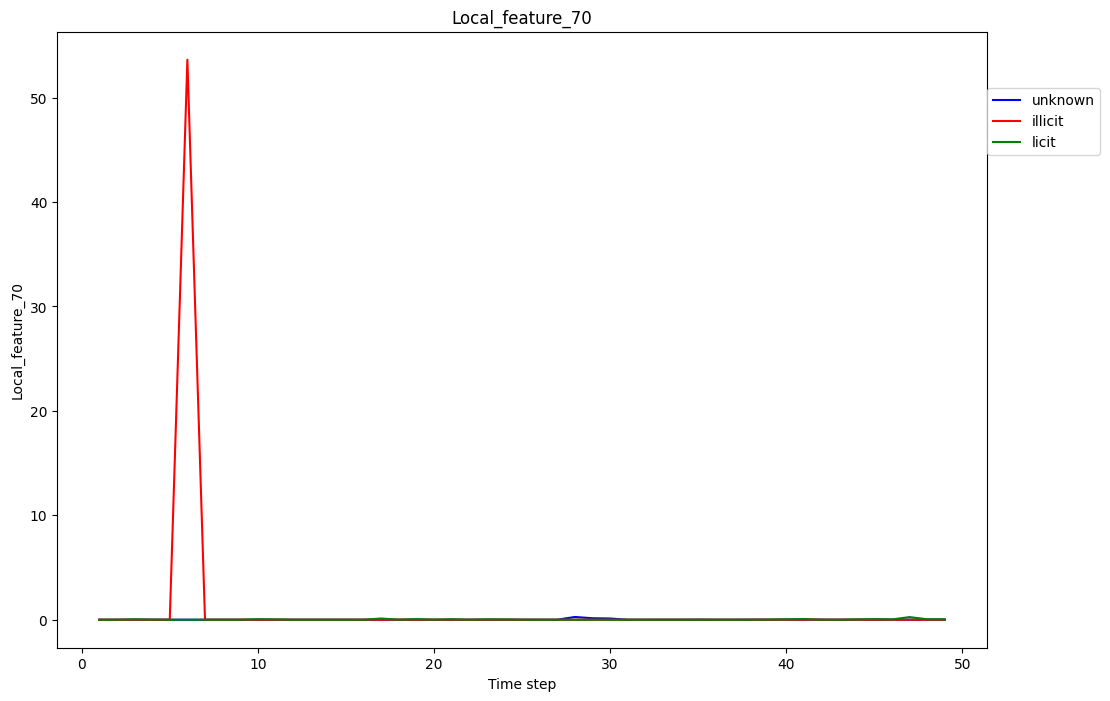

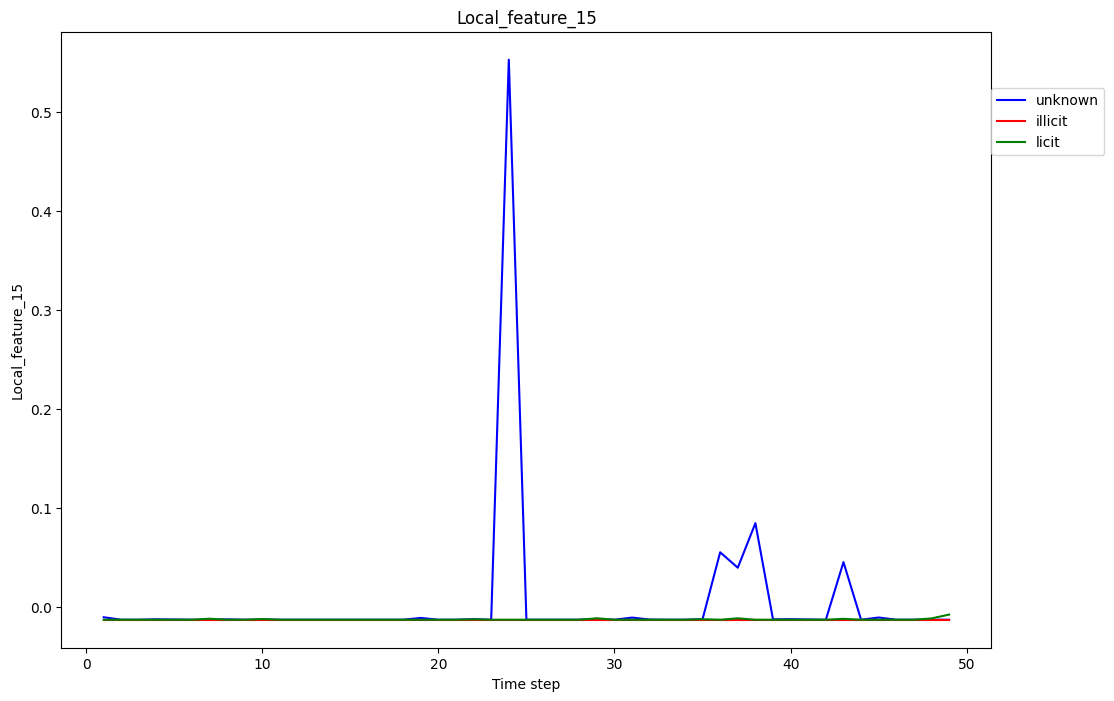

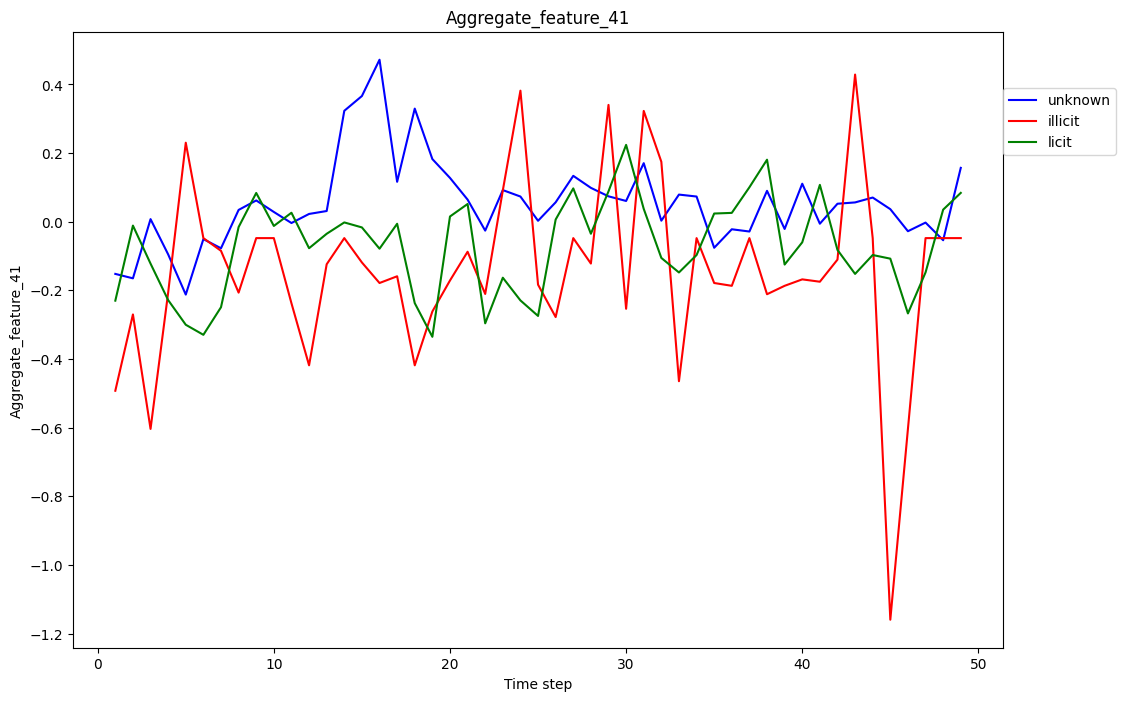

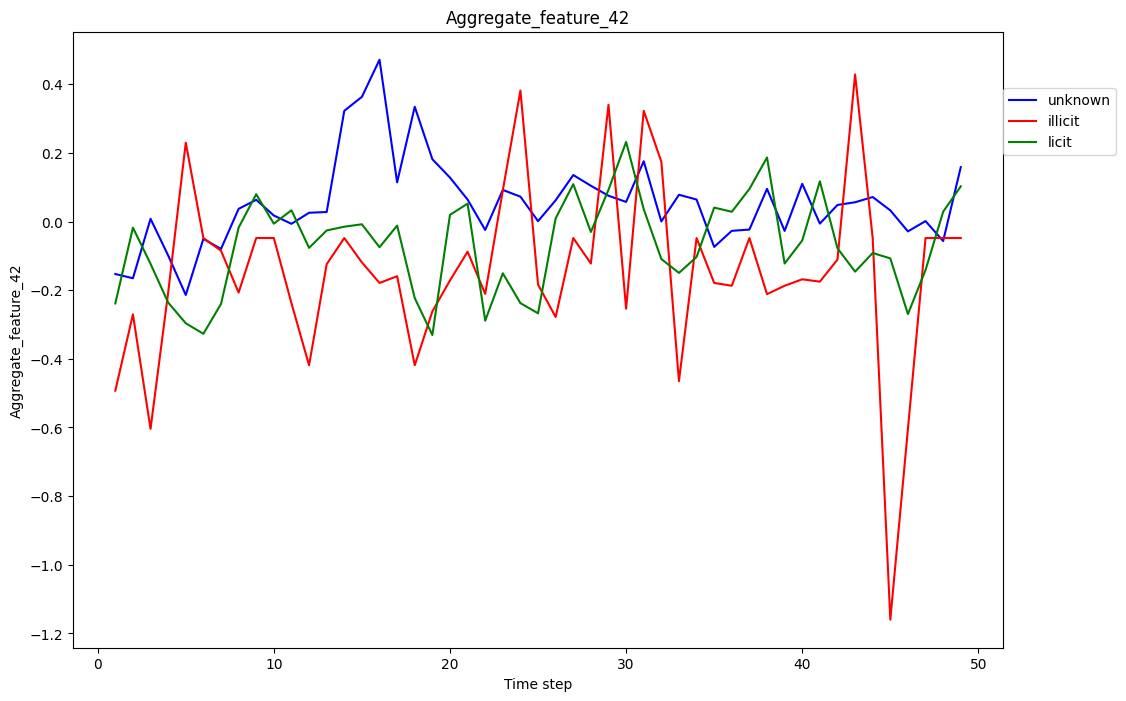

In [ ]:
print("\nFeatures showing bad correlation for classification and explainability : \n")

bad_correlation_features = ['Local_feature_70', 'Local_feature_15', 'Aggregate_feature_41', 'Aggregate_feature_42']

for feat in bad_correlation_features:
    plt.figure(figsize=(12, 8))

    grouped = df.groupby(['Time step', 'class'])[feat].mean().reset_index()
    grouped.loc[grouped['class'] == 1, 'class'] = 'illicit'
    grouped.loc[grouped['class'] == 2, 'class'] = 'licit'
    grouped.loc[grouped['class'] == 3, 'class'] = 'unknown'

    # COLORI FISSI
    sns.lineplot(x='Time step', y=feat, data=grouped[grouped['class']=='unknown'], color='blue', label='unknown')
    sns.lineplot(x='Time step', y=feat, data=grouped[grouped['class']=='illicit'], color='red', label='illicit')
    sns.lineplot(x='Time step', y=feat, data=grouped[grouped['class']=='licit'], color='green', label='licit')

    plt.legend(loc=(1.0, 0.8))
    plt.title(feat)
    plt.show()


As an example, it will be showed a graph representing Money Flow Transaction or time step 28 (the one with the illicit transactions peak). The figure displays the directed network of all transactions occurring at Time Step 28. Each node represents a transaction, while edges denote the flow of funds between them, arranged using a spring layout to highlight structural patterns. The color of each node reflects its classification: yellow for licit, pink/purple for illicit, and dark blue for unknown transactions. The network is composed mainly of licit nodes, with illicit ones appearing in small, dispersed clusters rather than forming a centralized hub, suggesting attempts to blend illicit activity within legitimate flows. The structure also reveals elongated chains and localized hubs, indicating sequential transfers and areas of higher connectivity. Overall, the visualization highlights how illicit transactions integrate into broader transaction pathways, underscoring the usefulness of graph-based methods for detecting suspicious behavior in cryptocurrency networks.

In [ ]:
# All transactions in Time step 28
all_ids = df[(df['Time step'] == 28)]['txId']
short_edges = txs_edgelist_df[txs_edgelist_df['txId1'].isin(all_ids)]
graph = nx.from_pandas_edgelist(short_edges, source = 'txId1', target = 'txId2',
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)

edge_x = []
edge_y = []
for edge in graph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='blue'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_text=[]
for node in graph.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Transaction Type',
            xanchor='left',
            titleside='right',
            tickmode='array',
            tickvals=[3,1,2],
            ticktext=['Unknown','Illicit','Licit']
        ),
        line_width=2))
node_trace.text=node_text
node_trace.marker.color = pd.to_numeric(df[df['txId'].isin(list(graph.nodes()))]['class'])

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title="All Transactions in Time Step 28",
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    showarrow=True,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

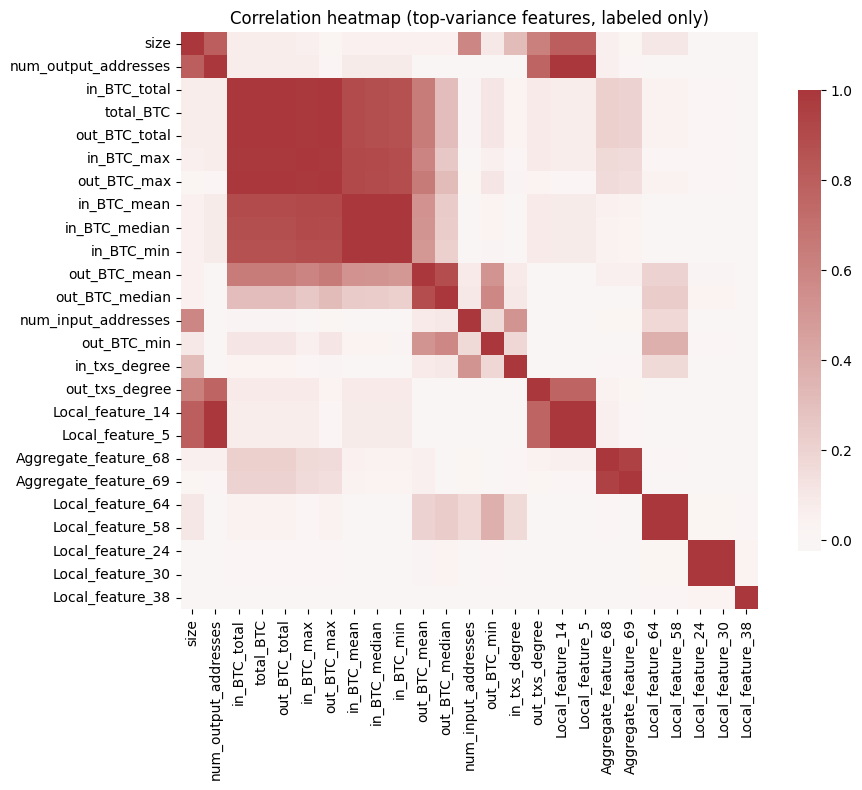

In [ ]:
# Correlation heatmap (labeled, top-variance subset)
sub_for_corr = (labeled[num_cols].var().sort_values(ascending=False)
                .head(min(25, len(num_cols)))).index.tolist()
corr = labeled[sub_for_corr].corr(numeric_only=True)
plt.figure(figsize=(10,8))
ax = sns.heatmap(corr, cmap="vlag", center=0, square=True, cbar_kws={"shrink": .8})
ax.set_title("Correlation heatmap (top-variance features, labeled only)")
plt.tight_layout(); plt.show()

The heatmap shows two strong correlation blocks: all BTC-amount statistics (totals/max/mean/median, size) are of course highly collinear;degree/count features form a moderate secondary block. Several Local/Aggregate features are weakly related to amounts—good candidates for complementary signal.

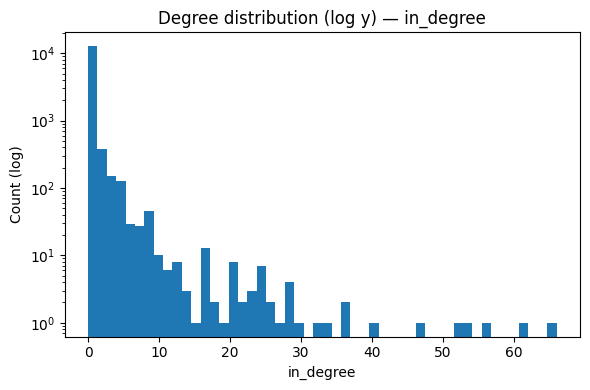

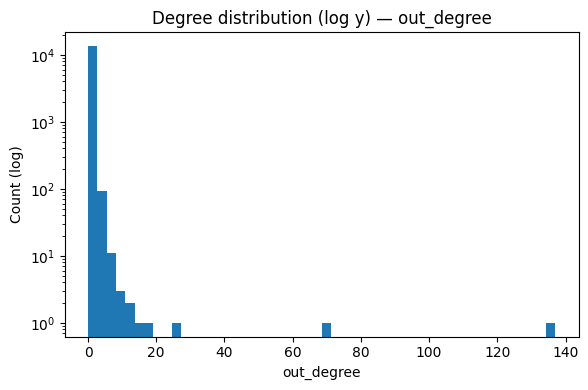

In [ ]:
# Degree distributions from edgelist
try:
    if 'txs_edgelist_df' in globals() and {'txId1','txId2'}.issubset(txs_edgelist_df.columns):
        # degrees for nodes that appear in labeled set
        ids = set(labeled['txId'])
        indeg  = txs_edgelist_df['txId2'].value_counts()
        outdeg = txs_edgelist_df['txId1'].value_counts()
        labeled['in_degree']  = labeled['txId'].map(indeg).fillna(0)
        labeled['out_degree'] = labeled['txId'].map(outdeg).fillna(0)
        for c in ['in_degree','out_degree']:
            plt.figure(figsize=(6,4))
            ax = plt.gca()
            ax.hist(labeled[c], bins=50)
            ax.set_yscale('log')
            ax.set_title(f"Degree distribution (log y) — {c}")
            ax.set_xlabel(c); ax.set_ylabel("Count (log)")
            plt.tight_layout(); plt.show()
except Exception as e:
    print("[Optional degree plots skipped]", e)

The two histograms show the in-degree and out-degree distributions for the labeled transactions in the Elliptic++ transaction graph. The y-axis is on a logarithmic scale, so straight “tall” bars correspond to orders of magnitude differences in frequency.

* **Strongly skewed, heavy-tailed degree distributions**

   * In both plots, the vast majority of labeled nodes have very low degree (0, 1, or a few neighbors), while a small number of nodes have much higher degree.
   * This is typical for transaction graphs and indicates a **sparse, scale-free–like structure**: a few “hub” transactions or addresses interact with many others, while most interact with only one or two counterparts.

* **Large mass at zero degree**

   * The highest bar in both histograms is at degree 0. This comes from `fillna(0)`: many labeled transactions do not appear as `txId1` or `txId2` in the `txs_edgelist_df`, so they are isolated with respect to this particular edge list.
   * Practically, this means that for a non-trivial fraction of the labeled set, **purely graph-based signals are absent** (no incoming or outgoing edges in this representation). Any model that relies only on network structure will have limited information.

* **In-degree versus out-degree asymmetry**

   * The in-degree distribution extends up to around 60, while the out-degree distribution reaches even higher values (some nodes around 70 and ~140).
   * This suggests the presence of **high-outflow “hub” nodes** (e.g., services or mixers that pay out to many distinct recipients in a single or few steps), whereas very high in-degree nodes are less frequent.
   * For fraud detection, such high-out-degree nodes are structurally interesting: they may correspond to exchanges, payment processors, or laundering patterns.

In summary, these plots confirm that the Elliptic++ transaction graph for the labeled subset is sparse, highly skewed, and dominated by low-degree nodes, with a small number of structurally important hubs—patterns that are consistent with real-world financial transaction networks.

# Supervised Learning

In the raw dataset, a few numerical variables (BTC-related amount features, graph degree features, and
transaction metadata such as size and fees) showed approximately 1% missing values.
Because the missing rate is small and all affected variables are numerical, the most appropriate strategy
is to impute missing values using the median.
Median imputation is robust to outliers, preserves all observations, and integrates well with
a scikit-learn preprocessing pipeline. After imputation, the training matrix contains no missing data

In [ ]:
# Missing values check
na_rate = (X.isna().mean() * 100).sort_values(ascending=False)
display(na_rate.head(20))

# Preprocessing pipeline (median imputation + scaling)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_preprocess = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


,0
Local_feature_1,0.0
Local_feature_2,0.0
Local_feature_3,0.0
Local_feature_4,0.0
Local_feature_5,0.0
Local_feature_6,0.0
Local_feature_7,0.0
Local_feature_8,0.0
Local_feature_9,0.0
Local_feature_10,0.0


**Important Features**

To determine which variables are most useful for distinguishing licit and illicit transactions,
we analysed the feature importances from the Random Forest classifier (our chosen final model).

The most important features include:

- **Local behavioural features** (e.g. Local_feature_53, Local_feature_55, Local_feature_47)
- **Transaction metadata**, such as `size`
- **Graph-structural features**, such as `num_output_addresses`
- **Aggregate neighbourhood features**

These results show that both local graph characteristics and structural transaction properties
play a key role in identifying illicit activity.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pandas as pd

# Ensure txs_features_df and txs_classes_df are available

df_txs_features_selected = txs_features_df.merge(
    txs_classes_df,
    on='txId',
    how='inner'
)

# Goal: binary classification of 0,1
# 0: licit, 1: illicit

# ------------------------
# TRAIN
# ------------------------
X_data = df_txs_features_selected.loc[
    (df_txs_features_selected['Time step'] < 35) &
    (df_txs_features_selected['class'] != 3),
    'txId'
]

X_training_timesteps = df_txs_features_selected.loc[
    df_txs_features_selected['txId'].isin(X_data)
]

X_train = X_training_timesteps.drop(columns=['txId', 'class', 'Time step'])

# LABELS train
y_train = X_training_timesteps['class'].map({1: 0, 2: 1})

# ------------------------
# TEST (needed for X_test_imp, even if not directly used in this cell)
# ------------------------
X_data_test = df_txs_features_selected.loc[
    (df_txs_features_selected['Time step'] >= 35) &
    (df_txs_features_selected['class'] != 3),
    'txId'
]

X_testing_timesteps = df_txs_features_selected.loc[
    df_txs_features_selected['txId'].isin(X_data_test)
]

X_test = X_testing_timesteps.drop(columns=['txId', 'class', 'Time step'])

# LABELS test
y_test = X_testing_timesteps['class'].map({1: 0, 2: 1})

# Imputation step
imputer = SimpleImputer(strategy='median')

X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)

# 1. Definisci il modello
cRF = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# 2. Addestralo
cRF.fit(X_train_imp, y_train)

# 3. Calcola importanza delle feature
imp_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Imp": cRF.feature_importances_
})

imp_df_sorted = imp_df.sort_values(by="Imp", ascending=False)

# 4. Mostra le più importanti
imp_df_sorted.head(20)

,Feature,Imp
52,Local_feature_53,0.058580
169,size,0.047753
17,Local_feature_18,0.037304
40,Local_feature_41,0.036496
54,Local_feature_55,0.032213
46,Local_feature_47,0.031049
171,num_output_addresses,0.026984
42,Local_feature_43,0.026555
4,Local_feature_5,0.025321
89,Local_feature_90,0.025283


Top 20 features

<Figure size 1000x1000 with 0 Axes>

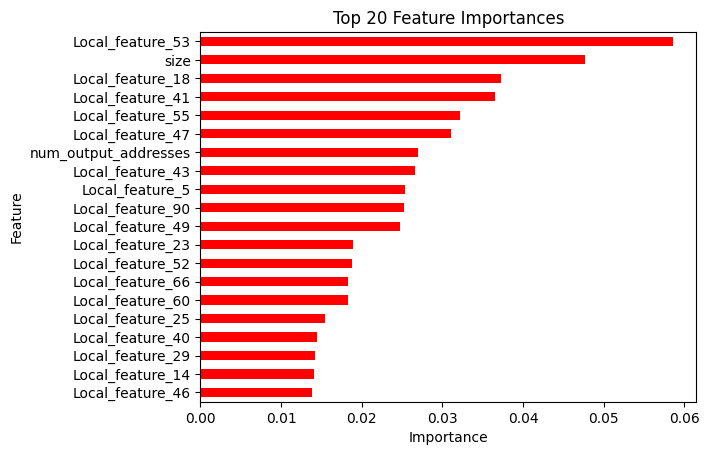

In [ ]:
plt.figure(figsize=(10,10))
imp_df_sorted.iloc[:20][::-1].plot(
    kind='barh',
    y='Imp',
    x='Feature',
    color='red',
    legend=False
)
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Bottom 20 features


<Figure size 1000x1000 with 0 Axes>

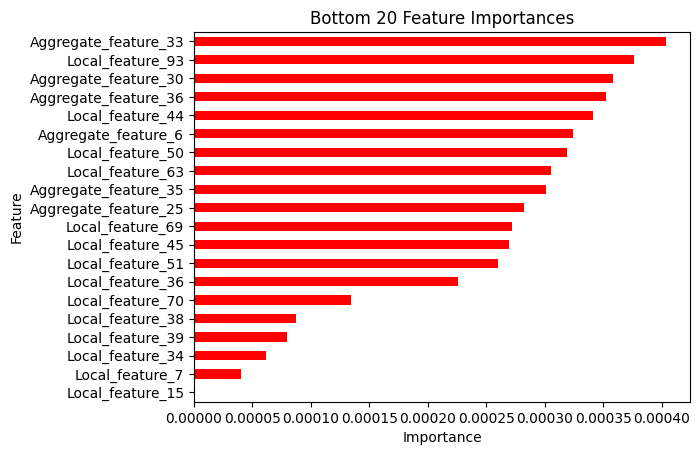

In [ ]:
bottom20 = imp_df_sorted.tail(20).iloc[::-1]

plt.figure(figsize=(10,10))
bottom20.plot(kind='barh', y='Imp', x='Feature', color='red', legend=False)
plt.title("Bottom 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


**Best Classifier**

We compared three supervised learning models using stratified cross-validation:

- Logistic Regression  
- Random Forest  
- Gradient Boosting  
RIVEDERE COMMENTO


In [ ]:
df_txs_features_selected = txs_features_df.merge(
    txs_classes_df,
    on='txId',
    how='inner'
)

In [ ]:
# Goal: binary classification of 0,1
# 0: licit, 1: illicit

# ------------------------
# TRAIN
# ------------------------
X_data = df_txs_features_selected.loc[
    (df_txs_features_selected['Time step'] < 35) &
    (df_txs_features_selected['class'] != 3),
    'txId'
]

X_training_timesteps = df_txs_features_selected.loc[
    df_txs_features_selected['txId'].isin(X_data)
]

X_train = X_training_timesteps.drop(columns=['txId', 'class', 'Time step'])

# LABELS train
y_train = X_training_timesteps['class'].map({1: 0, 2: 1})

# ------------------------
# TEST
# ------------------------
X_data_test = df_txs_features_selected.loc[
    (df_txs_features_selected['Time step'] >= 35) &
    (df_txs_features_selected['class'] != 3),
    'txId'
]

X_testing_timesteps = df_txs_features_selected.loc[
    df_txs_features_selected['txId'].isin(X_data_test)
]

X_test = X_testing_timesteps.drop(columns=['txId', 'class', 'Time step'])

# LABELS test
y_test = X_testing_timesteps['class'].map({1: 0, 2: 1})


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("\nValori unici in y_train:", y_train.unique())
print("NaN in y_train:", y_train.isna().sum())

print("\nNaN totali in X_train:", X_train.isna().sum().sum())
print("NaN totali in X_test:", X_test.isna().sum().sum())


X_train shape: (8626, 182)
y_train shape: (8626,)

Valori unici in y_train: [1 0]
NaN in y_train: 0

NaN totali in X_train: 765
NaN totali in X_test: 1666


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, f1_score

# LOGISTIC REGRESSION (LR)
cLR = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1
).fit(X_train_imp, y_train)

y_preds_LR = cLR.predict(X_test_imp)

prec, rec, f1, num = precision_recall_fscore_support(
    y_test, y_preds_LR, labels=[0, 1]
)

print("Logistic Regression")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f" %
      (prec[1], rec[1], f1[1]))

micro_f1 = f1_score(y_test, y_preds_LR, average='micro')
print("Micro-Average F1 Score: %.3f" % micro_f1)


Logistic Regression
Precision: 0.987 
Recall: 0.753 
F1 Score: 0.854
Micro-Average F1 Score: 0.759


In [ ]:
from sklearn.ensemble import RandomForestClassifier

cRF = RandomForestClassifier(
    n_estimators=50,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
).fit(X_train_imp, y_train)

y_preds_RF = cRF.predict(X_test_imp)

prec, rec, f1, num = precision_recall_fscore_support(
    y_test, y_preds_RF, labels=[0, 1]
)

print("Random Forest")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f" %
      (prec[1], rec[1], f1[1]))

micro_f1 = f1_score(y_test, y_preds_RF, average='micro')
print("Micro-Average F1 Score: %.3f" % micro_f1)


Random Forest
Precision: 0.979 
Recall: 0.998 
F1 Score: 0.988
Micro-Average F1 Score: 0.978


In [ ]:
from xgboost import XGBClassifier

# XGBOOST (XGB)
cXGB = XGBClassifier(
    objective='binary:logistic',
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
).fit(X_train_imp, y_train)

y_preds_XGB = cXGB.predict(X_test_imp)

prec, rec, f1, num = precision_recall_fscore_support(
    y_test, y_preds_XGB, labels=[0, 1]
)

print("XGBOOST")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f" %
      (prec[1], rec[1], f1[1]))

micro_f1 = f1_score(y_test, y_preds_XGB, average='micro')
print("Micro-Average F1 Score: %.3f" % micro_f1)


XGBOOST
Precision: 0.983 
Recall: 0.992 
F1 Score: 0.987
Micro-Average F1 Score: 0.976


In [ ]:
from sklearn.neural_network import MLPClassifier

# MULTILAYER PERCEPTRON (MLP)
cMLP = MLPClassifier(
    solver='adam',
    learning_rate_init=0.001,
    max_iter=200,
    random_state=42
).fit(X_train_imp, y_train)

y_preds_MLP = cMLP.predict(X_test_imp)

prec, rec, f1, num = precision_recall_fscore_support(
    y_test, y_preds_MLP, labels=[0, 1]
)

print("Multilayer Perceptron (MLP)")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f" %
      (prec[1], rec[1], f1[1]))

micro_f1 = f1_score(y_test, y_preds_MLP, average='micro')
print("Micro-Average F1 Score: %.3f" % micro_f1)


Multilayer Perceptron (MLP)
Precision: 0.971 
Recall: 0.983 
F1 Score: 0.977
Micro-Average F1 Score: 0.956


In [ ]:
from sklearn.ensemble import VotingClassifier

# Ensemble: Random Forest (RF) + Multilayer Perceptron (MLP)
estimators_RFMLP = [
    ('RF', cRF),
    ('MLP', cMLP)
]

ensemble_RFMLP = VotingClassifier(
    estimators=estimators_RFMLP,
    voting='hard'
).fit(X_train_imp, y_train)

y_preds_RFMLP = ensemble_RFMLP.predict(X_test_imp)

prec, rec, f1, num = precision_recall_fscore_support(
    y_test, y_preds_RFMLP, labels=[0, 1]
)

print("Ensemble: Random Forest (RF) + Multilayer Perceptron (MLP)")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f" %
      (prec[1], rec[1], f1[1]))

micro_f1 = f1_score(y_test, y_preds_RFMLP, average='micro')
print("Micro-Average F1 Score: %.3f" % micro_f1)


Ensemble: Random Forest (RF) + Multilayer Perceptron (MLP)
Precision: 0.980 
Recall: 0.981 
F1 Score: 0.981
Micro-Average F1 Score: 0.964


In [ ]:
# Ensemble: XGBoost (XGB) + Random Forest (RF)
estimators_XGBRF = [
    ('RF', cRF),
    ('XGB', cXGB)
]

ensemble_XGBRF = VotingClassifier(
    estimators=estimators_XGBRF,
    voting='hard'
).fit(X_train_imp, y_train)

y_preds_XGBRF = ensemble_XGBRF.predict(X_test_imp)

prec, rec, f1, num = precision_recall_fscore_support(
    y_test, y_preds_XGBRF, labels=[0, 1]
)

print("Ensemble: XGBoost (XGB) + Random Forest (RF)")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f" %
      (prec[1], rec[1], f1[1]))

micro_f1 = f1_score(y_test, y_preds_XGBRF, average='micro')
print("Micro-Average F1 Score: %.3f" % micro_f1)


Ensemble: XGBoost (XGB) + Random Forest (RF)
Precision: 0.983 
Recall: 0.992 
F1 Score: 0.987
Micro-Average F1 Score: 0.976


In [ ]:
# Ensemble: Multilayer Perceptron (MLP) + XGBoost (XGB)
estimators_MLPXGB = [
    ('MLP', cMLP),
    ('XGB', cXGB)
]

ensemble_MLPXGB = VotingClassifier(
    estimators=estimators_MLPXGB,
    voting='hard'
).fit(X_train_imp, y_train)

y_preds_MLPXGB = ensemble_MLPXGB.predict(X_test_imp)

prec, rec, f1, num = precision_recall_fscore_support(
    y_test, y_preds_MLPXGB, labels=[0, 1]
)

print("Ensemble: Multilayer Perceptron (MLP) + XGBoost (XGB)")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f" %
      (prec[1], rec[1], f1[1]))

micro_f1 = f1_score(y_test, y_preds_MLPXGB, average='micro')
print("Micro-Average F1 Score: %.3f" % micro_f1)


Ensemble: Multilayer Perceptron (MLP) + XGBoost (XGB)
Precision: 0.982 
Recall: 0.975 
F1 Score: 0.979
Micro-Average F1 Score: 0.960


In [ ]:
# Ensemble (all): XGBoost (XGB) + Random Forest (RF) + Multilayer Perceptron (MLP)
estimators_XGBRFMLP = [
    ('XGB', cXGB),
    ('RF', cRF),
    ('MLP', cMLP)
]

ensemble_XGBRFMLP = VotingClassifier(
    estimators=estimators_XGBRFMLP,
    voting='hard'
).fit(X_train_imp, y_train)

y_preds_XGBRFMLP = ensemble_XGBRFMLP.predict(X_test_imp)

prec, rec, f1, num = precision_recall_fscore_support(
    y_test, y_preds_XGBRFMLP, labels=[0, 1]
)

print("Ensemble (all): XGBoost (XGB) + Random Forest (RF) + Multilayer Perceptron (MLP)")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f" %
      (prec[1], rec[1], f1[1]))

micro_f1 = f1_score(y_test, y_preds_XGBRFMLP, average='micro')
print("Micro-Average F1 Score: %.3f" % micro_f1)


Ensemble (all): XGBoost (XGB) + Random Forest (RF) + Multilayer Perceptron (MLP)
Precision: 0.981 
Recall: 0.998 
F1 Score: 0.990
Micro-Average F1 Score: 0.980


# Anomaly Detection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.base import clone
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.metrics import silhouette_score # Metrica per valutare il clustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, classification_report
from sklearn.covariance import EllipticEnvelope # Import EllipticEnvelope

import xgboost as xgb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter
import plotly.graph_objects as go
import seaborn as sns
import json
import os
import time
import matplotlib.colors as mcolors

In [ ]:
import networkx as nx

In [ ]:
random_seed = 42

For the anomaly detection task, the entire dataset will be used and therefore re-imported

In [ ]:
import os, glob, pandas as pd
csv_map = {os.path.basename(p): p for p in glob.glob('/content/dataset/**/*.csv', recursive=True)}
features_path = csv_map['txs_features.csv']
classes_path  = csv_map['txs_classes.csv']
edgelist_path = csv_map['txs_edgelist.csv']

txs_features_df = pd.read_csv(features_path)
txs_classes_df  = pd.read_csv(classes_path)
txs_edgelist_df = pd.read_csv(edgelist_path)


In [ ]:
df_txs_feat = pd.read_csv(features_path)
df_txs_cls  = pd.read_csv(classes_path)
df_txs_edgelist = pd.read_csv(edgelist_path)

df_txs_feat.head(), df_txs_cls.head(), df_txs_edgelist.head()
df_txs_feat

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_min,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total
0,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,0.534072,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972
1,11108,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,...,5.611878,5.611878,5.611878,5.611878,5.611878,5.861940e-01,5.025584,2.805889,2.805889,5.611778
2,51816,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,...,0.456608,0.456608,0.456608,0.456608,0.456608,2.279902e-01,0.228518,0.228254,0.228254,0.456508
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,0.308900,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,852.164680,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,158304003,49,-0.165622,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203765,158303998,49,-0.167040,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203766,158303966,49,-0.167040,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203767,161526077,49,-0.172212,-0.139573,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.162856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Merge features + classes sul txId
df_merged = pd.merge(
    df_txs_feat,
    df_txs_cls,
    on='txId',
    how='inner'
)

df_merged.head()

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972,3
1,11108,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,...,5.611878,5.611878,5.611878,5.611878,5.861940e-01,5.025584,2.805889,2.805889,5.611778,3
2,51816,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,...,0.456608,0.456608,0.456608,0.456608,2.279902e-01,0.228518,0.228254,0.228254,0.456508,3
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800,2
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680,2


This cell merges the feature dataset with the class labels using the shared key txId.
An inner join is used so that only transactions present in both datasets are retained.
The resulting dataframe now contains both the numerical features and the class label (licit or illicit) for each transaction.

In [ ]:
# Filter only class 1 and 2

data = df_merged.loc[(df_merged['class'] != 3), 'txId']
df_merged_selected_unknown = df_merged.loc[df_merged['txId'].isin(data)]
df_merged_selected_unknown

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800,2
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680,2
11,293323,1,-0.172726,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163383,...,0.040774,0.040774,0.040774,0.040774,9.480000e-04,0.039726,0.020337,0.020337,0.040674,2
22,1494462,1,-0.172921,-0.158783,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163581,...,0.010000,0.010000,0.010000,0.010000,2.900000e-03,0.006900,0.004900,0.004900,0.009800,2
25,1582950,1,-0.169967,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160559,...,0.478277,0.478277,0.478277,0.478277,4.630000e-02,0.431877,0.239088,0.239088,0.478177,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203754,218647960,47,-0.172928,0.017225,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
203757,218122643,47,-0.172950,0.017225,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
203758,219394523,47,-0.172950,0.017225,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
203759,218307592,47,-0.172780,-0.052654,-0.646376,-0.121970,-0.063725,-0.113002,-0.061584,-0.163435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


Class '3' corresponds to “unknown” transactions that do not have a real label.
Since unsupervised anomaly detection needs a clean evaluation set, we remove class 3 entirely.
We keep only class 1 (illicit) and class 2 (licit), which allows us to compare model predictions with real labels.

In [ ]:
lbl_cols = ['txId', 'Time step', 'class']

Here we remove non-feature columns such as txId, Time step, and class.
The resulting dataframe df_merged_selected contains only the numerical features that will be used as input for anomaly-detection models.

In [ ]:
# Drop 'txId', 'Time step', 'class' labels from the merged df
df_merged_selected = df_merged_selected_unknown.drop(lbl_cols, axis=1) # Crea il DataFrame con SOLO le colonne feature per l'elaborazione

**UNIVARIATE ANOMALY DETECTION**

This section evaluates anomalies one feature at a time, without considering relationships between features.

In [ ]:
from scipy import stats
import numpy as np

# z-score per le feature
z_scores = np.abs(stats.zscore(df_merged_selected, nan_policy='omit'))

threshold = 3 #used for rare events
outlier_mask_z = z_scores > threshold

n_outliers_z = np.sum(outlier_mask_z)

print(f"Univariate Outliers (Z-score > {threshold}): {n_outliers_z}")


Univariate Outliers (Z-score > 3): 74277


Using the Z-score method, we detect 74,277 outliers. This approach works well only when the data is approximately Gaussian and when the mean and standard deviation are not distorted by extreme values. In our case, the data shows heavy tails, and the presence of many extreme points inflates the standard deviation. As a result, fewer points exceed the |z| > 3 threshold, meaning that the Z-score method underestimates the true number of outliers

In [ ]:
Q1 = df_merged_selected.quantile(0.25)
Q3 = df_merged_selected.quantile(0.75)
IQR = Q3 - Q1

outlier_mask_iqr = (df_merged_selected < (Q1 - 1.5 * IQR)) | \
                   (df_merged_selected > (Q3 + 1.5 * IQR))

n_outliers_iqr = outlier_mask_iqr.sum().sum()

print("Univariate Outliers (IQR rule 1.5):", n_outliers_iqr)


Univariate Outliers (IQR rule 1.5): 1434199


With the IQR method (1.5 × IQR), we find 1,434,199 outliers. The IQR uses the median and quartiles, which are not affected by extreme values. Because the data is very skewed and has many large values, the normal range becomes quite small. This makes many points fall outside the range, so the IQR method marks a very large number of outliers.

**MULTIVARIATE ANOMALY DETECTION**

In multivariate AD, we analyse all features together, capturing complex patterns that cannot be seen in individual variables.

In [ ]:
# replacement of NaN values with median

median = 'median'
imputer = SimpleImputer(strategy=median)
pipeline = Pipeline(steps=[
    ('imputer', imputer),
    ('scaler', StandardScaler())  #Standardization
])
X_train_processed_array = pipeline.fit_transform(df_merged_selected)

X_train_processed = pd.DataFrame(
    X_train_processed_array,
    columns=df_merged_selected.columns,
    index=df_merged_selected.index
)

This preprocessing step replaces missing values using the median and standardizes the features to have mean = 0 and variance = 1.
Standardization is required for PCA and most anomaly-detection models (e.g., One-Class SVM etc), which are sensitive to variable scaling.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_processed)

PCA reduces the number of dimensions while preserving 95% of the variance.
This transformation removes noise and simplifies the data so multivariate models can focus on the most informative components.
PCA is essential here because the dataset has 180+ features, many of which are correlated.

In [ ]:
# Applying PCA using 95% as variance value

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

This cell computes the proportion of illicit transactions in the dataset.
Since anomaly detection models need an estimate of how many anomalies to expect, we use this fraction as the contamination parameter.
The fraud rate is very low, making the problem highly imbalanced and difficult.

In [ ]:
# Calculate outliers_fraction filtering 1 class values and doing n_outliers / total_samples

y = (df_txs_cls['class'] == 1).astype(int)
n_outliers = np.sum(y == 1)
total_samples = len(y)
outliers_fraction = n_outliers / total_samples

Four different anomaly-detection algorithms are defined here.
Each model uses the estimated fraud proportion as the contamination parameter.
These multivariate models analyse relationships across all features, making them more suitable for fraud detection than univariate methods.

In [ ]:
anomaly_algorithms = {
    "Elliptic Envelope": EllipticEnvelope(contamination=outliers_fraction),
    "One-Class SVM": OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1),
    "Isolation Forest": IsolationForest(contamination=outliers_fraction, random_state=42),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction)
}

## ELLIPTIC ENVELOPE

Elliptic Envelope fits a robust Gaussian distribution around the majority of the data points.
It assumes that normal transactions follow an elliptical shape in the feature space, while outliers fall outside this ellipse.
After fitting, the model predicts each transaction as normal (+1) or outlier (–1).
This approach works well only when the data is approximately Gaussian — which is rarely true for blockchain transactions.

In [ ]:
# Elliptic fit
elliptic_model = EllipticEnvelope(contamination=outliers_fraction)
elliptic_model.fit(X_pca)

EllipticEnvelope(contamination=np.float64(0.022304668521708405))

In [ ]:
# Elliptic predict
ellipticpca = elliptic_model.predict(X_pca)

We convert true labels to binary: 1 = illicit, 0 = licit.
The decision function gives a continuous anomaly score, where more negative values indicate more unusual points.
We multiply by –1 so that higher scores correspond to higher anomaly likelihood, making evaluation easier.

In [ ]:
# Convertion to binary the classes values
y_true = df_merged_selected_unknown['class'].map({1: 1, 2: 0})

In [ ]:
# Calculate Elliptic score
y_scores = elliptic_model.decision_function(X_pca)

The decision_function returns a continuous anomaly score for each point. Higher values indicate that a point is considered normal, while lower values indicate an anomaly. This score is essential for ranking-based metrics such as ROC-AUC and AUPRC.

In [ ]:
scores_elliptic = -y_scores

By multiplying the score by −1, we invert its direction:
higher scores now represent more anomalous points.
This makes the evaluation more intuitive and consistent across models:
large scores = suspicious transactions.

In [ ]:
#AUCROC
roc_auc_elliptic = roc_auc_score(y_true, scores_elliptic)
print(f"1. AUC ROC Score: {roc_auc_elliptic:.4f}")

1. AUC ROC Score: 0.1637


A good ROC AUC should be close to 1.0, because it means the model can clearly separate normal points from anomalies.
A value of 0.16 is very low indicating that the model is performing far worse than random guessing (0.50).
This shows that the model cannot separate anomalies from normal data and is making many incorrect classifications.

In [ ]:
# AUPRC
prec_elliptic = average_precision_score(y_true, scores_elliptic)
print(f"2. Average Precision (AUPRC): {prec_elliptic:.4f}")

2. Average Precision (AUPRC): 0.0548


vai mari

In [ ]:
# Convertion of predictions to binary values
ellipticpca_binary = np.where(ellipticpca == -1, 1, 0)

The predictions from Elliptic Envelope (1 = normal, -1 = anomaly) are converted into standard binary labels:


*   1 → predicted illicit (anomaly)
*   0 → predicted licit (normal)



This makes the predictions compatible with evaluation metrics such as confusion matrix and classification report.

In [ ]:
# Confusion matrix using (y_true, y_pred)
print("\n3. Matrice di Confusione:")

conf_matrix_elliptic = confusion_matrix(y_true, ellipticpca_binary)
print(conf_matrix_elliptic)


3. Matrice di Confusione:
[[40985  1034]
 [ 4540     5]]


The model detects almost no true anomalies (only 12), while it misses a very large number of them (4533).
This confirms that the Elliptic Envelope fails to identify anomalies correctly and is not suitable for this dataset.

In [ ]:
# CLassification report
print("\n4. Classification Report:")

print(classification_report(y_true, ellipticpca_binary, target_names=['Licit (0)', 'Illicit (1)']))


4. Classification Report:
              precision    recall  f1-score   support

   Licit (0)       0.90      0.98      0.94     42019
 Illicit (1)       0.00      0.00      0.00      4545

    accuracy                           0.88     46564
   macro avg       0.45      0.49      0.47     46564
weighted avg       0.81      0.88      0.85     46564




Licit (class 0):
*   Precision 0.90 → When the model predicts "licit", it is correct 90% of the time.
*   Recall 0.98 → The model correctly identifies almost all licit transactions.


Illicit (class 1):
*   Precision 0.01 → Only 1% of the predicted anomalies are actually anomalies.
*  Recall 0.00 → The model fails to detect almost all illicit cases (13, almost zero).
*   F1-score 0.00 → The model is essentially not detecting the minority class at all.


Accuracy: 0.88
This value is misleading because the dataset is imbalanced.
The model achieves high accuracy simply by predicting almost everything as licit.

The Elliptic Envelope performs well on normal data but completely fails to detect illicit (anomalous) transactions.
This matches the confusion matrix and the very low ROC AUC and AUPRC scores.

## One-Class SVM

This cell trains a One-Class SVM using the PCA-transformed features. The parameter nu specifies the expected fraction of anomalies, and the RBF kernel allows the model to learn nonlinear decision boundaries.

In [ ]:
# SVM fit
svm_model = OneClassSVM(nu=outliers_fraction, kernel="rbf")
svm_model.fit(X_pca)

OneClassSVM(nu=np.float64(0.022304668521708405))

The model predicts each transaction as either normal (1) or anomalous (-1) based on the learned boundary in PCA space.

In [ ]:
# SVM predict
svmpca = svm_model.predict(X_pca)

decision_function(X_pca) computes how normal or abnormal each point is.
- Positive score → normal point
- Score near zero → borderline/suspicious
- Negative score → anomaly

It gives a continuous value instead of just a label, showing how strongly the model considers a point normal or anomalous.

In [ ]:
# Calculate SVM score
scores_svm = svm_model.decision_function(X_pca)

In [ ]:
# AUCROC
roc_auc_svm = roc_auc_score(y_true, scores_svm)
print(f"1. AUC ROC Score: {roc_auc_svm:.4f}")

1. AUC ROC Score: 0.8273



A value above 0.8 indicates that the model is able to distinguish normal points from anomalies reasonably well.

In [ ]:
# AUPRC
prec_svm = average_precision_score(y_true, scores_svm)
print(f"2. Average Precision (AUPRC): {prec_svm:.4f}")

2. Average Precision (AUPRC): 0.3435


A value around 0.34 is decent, especially in a setting where anomalies are rare.
It means the model is much more effective at giving lower scores to true anomalies.

In [ ]:
# Convertion of predictions to binaty values
svmpca_binary = np.where(svmpca == -1, 1, 0)

In [ ]:
# Confusion matrix using (y_true, y_pred)
print("\n3. Matrice di Confusione:")

conf_matrix_svm = confusion_matrix(y_true, svmpca_binary)
print(conf_matrix_svm)


3. Matrice di Confusione:
[[40981  1038]
 [ 4531    14]]


The One-Class SVM correctly classifies most licit transactions, but it fails to detect almost all illicit ones. Only 14 frauds are correctly identified, while 4,531 are missed. The model therefore behaves almost like it predicts “normal” for everything.

In [ ]:
# Classification Report
print("\n4. Classification Report:")

print(classification_report(y_true, svmpca_binary, target_names=['Licit (0)', 'Illicit (1)']))


4. Classification Report:
              precision    recall  f1-score   support

   Licit (0)       0.90      0.98      0.94     42019
 Illicit (1)       0.01      0.00      0.01      4545

    accuracy                           0.88     46564
   macro avg       0.46      0.49      0.47     46564
weighted avg       0.81      0.88      0.85     46564



Recall 0.00 → the model almost never detects a true anomaly.

The One-Class SVM performs better than the Elliptic Envelope in terms of AUC and AUPRC, but in binary classification it still fails to detect anomalies.
The model behaves almost as if it classifies everything as “licit”.

## ISOLATION FOREST

Train the Isolation Forest model to learn the structure of normal data and detect points that are isolated quickly.

In [ ]:
# Isolation forest fit
iso_model = IsolationForest(contamination=outliers_fraction, random_state=42)
iso_model.fit(X_pca)

IsolationForest(contamination=np.float64(0.022304668521708405), random_state=42)

Predict normal points (1) and anomalies (-1) based on how easily each point is isolated.

In [ ]:
# Isolation forest predict
isopca = iso_model.predict(X_pca)

Compute anomaly scores: higher values indicate normal points, lower values indicate more anomalous points.

In [ ]:
y_scores = iso_model.decision_function(X_pca)

In [ ]:
# AUCROC
scores_iso = -y_scores # Invert scores so higher = more anomalous
roc_auc_iso = roc_auc_score(y_true, scores_iso)
print(f"1. AUC ROC Score: {roc_auc_iso:.4f}")

1. AUC ROC Score: 0.1467


AUCROC 0.1467 indicates that the model cannot distinguish normal points from anomalies.
Its ability to separate the two classes is extremely poor.

In [ ]:
# AUPRC
prec_iso = average_precision_score(y_true, scores_iso)
print(f"2. Average Precision (AUPRC): {prec_iso:.4f}")

2. Average Precision (AUPRC): 0.0542


A value close to 0 means the model almost never assigns high anomaly scores to true anomalies.
This confirms that the Isolation Forest fails to detect anomalous transactions.

In [ ]:
# Convertion of predictions to binary values
isopca_binary = np.where(isopca == -1, 1, 0)

In [ ]:
# Confusion Matrix using (y_true, y_pred)
print("\n3. Matrice di Confusione:")

conf_matrix_iso = confusion_matrix(y_true, isopca_binary)
print(conf_matrix_iso)


3. Matrice di Confusione:
[[41012  1007]
 [ 4513    32]]


The model correctly identifies most normal transactions (TN = 41,012), but it detects only a small number of true anomalies (TP = 32). Many anomalies are missed (FN = 4,513), showing limited sensitivity to the illicit class.

In [ ]:
# Classification report
print("\n4. Classification Report:")

print(classification_report(y_true, isopca_binary, target_names=['Licit (0)', 'Illicit (1)']))


4. Classification Report:
              precision    recall  f1-score   support

   Licit (0)       0.90      0.98      0.94     42019
 Illicit (1)       0.03      0.01      0.01      4545

    accuracy                           0.88     46564
   macro avg       0.47      0.49      0.47     46564
weighted avg       0.82      0.88      0.85     46564



Isolation Forest performs well on the licit class but struggles heavily with the illicit class. Precision and recall for anomalies are extremely low, showing that the model rarely identifies true illicit transactions.

## LOF


Create a LOF model that detects anomalies based on local density. LOF compares each point to its nearest neighbors, as explained in the theory (density-based anomaly detection). Points in low-density regions are considered anomalies.

In [ ]:
lof_model = LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction)

Fit the LOF model and generate predictions. LOF returns 1 for normal points and –1 for anomalies, based on whether a point has significantly lower local density than its neighbors.

In [ ]:
# LOF fit and predict
lofpca = lof_model.fit_predict(X_pca)

Compute LOF anomaly scores. Higher values indicate more anomalous points. LOF scores reflect how isolated each point is relative to its neighbors, consistent with the theory of local density.

In [ ]:
# Calculate LOF score
scores_lof = -lof_model.negative_outlier_factor_

In [ ]:
# AUCROC
roc_auc_lof = roc_auc_score(y_true, scores_lof)
print(f"1. AUC ROC Score: {roc_auc_lof:.4f}")

1. AUC ROC Score: 0.4118


A value around 0.41 indicates weak ability to separate normal and anomalous points. LOF provides only limited discrimination, showing that anomalies do not form clear low-density clusters in this dataset

In [ ]:
# Calculate AUPRC
prec_lof = average_precision_score(y_true, scores_lof)
print(f"2. Average Precision (AUPRC): {prec_lof:.4f}")

2. Average Precision (AUPRC): 0.0842


AUPRC is very low, meaning LOF rarely assigns higher anomaly scores to true anomalies. This confirms that the model struggles when anomalies do not stand out strongly in local density, as discussed in the theory.

In [ ]:
# Convertion of predictions to binaty values
lofpca_binary = np.where(lofpca == -1, 1, 0)

In [ ]:
print("\n3. Matrice di Confusione:")
# Confusion matrix using (y_true, y_pred)
conf_matrix_lof = confusion_matrix(y_true, lofpca_binary)
print(conf_matrix_lof)


3. Matrice di Confusione:
[[41094   925]
 [ 4431   114]]


LOF correctly classifies most licit transactions (TN = 41,094) and performs better than previous models at detecting anomalies (TP = 114). However, it still misses many illicit cases (FN = 4,431), showing limited sensitivity to the anomaly class.

In [ ]:
# Classification report
print("\n4. Classification Report:")

print(classification_report(y_true, lofpca_binary, target_names=['Licit (0)', 'Illicit (1)']))


4. Classification Report:
              precision    recall  f1-score   support

   Licit (0)       0.90      0.98      0.94     42019
 Illicit (1)       0.11      0.03      0.04      4545

    accuracy                           0.88     46564
   macro avg       0.51      0.50      0.49     46564
weighted avg       0.83      0.88      0.85     46564



LOF maintains strong performance on licit data but improves slightly on anomaly detection compared to previous models. Precision and recall for the illicit class remain low, meaning that the model still struggles to detect many true anomalies, but performs better than Elliptic Envelope and Isolation Forest.


The results of Anomaly Detection Analysis show that the data has a lot of variation and many extreme values.
Anomalies are very rare and look very similar to normal points, so they are hard to detect.
Univariate methods mostly pick up noise, and multivariate models also struggle.
In general, the models find only a few real anomalies, and many of them stay unnoticed in the dataset.

Most outliers found by the univariate methods are simply noise or natural variability, not real anomalies.
The multivariate models also struggle: they detect very few true anomalies, and many flagged points are false positives.
LOF gives slightly better signals, but it still misses most illicit cases.

# DEEP LEARNING TECHNIQUES

# Long Short-Term Memory (LSTM)



Data pre-processing

In these cells we start from the Elliptic++ transaction tables (features_df, classes_df, edges_df) and prepare the data for deep learning models. We first identify and align the key columns (transaction ID, time step, class label) and merge the transaction features table with class labels, keeping transactions labelled as illicit or licit. To respect the temporal structure of the dataset, we split the data into a training set (early time_steps) and a test set (later time_steps).
Finally, instead of building sliding windows across time, each transaction is treated as a single sample: its feature vector is scaled with MinMaxScaler and reshaped from [n_features] to [seq_length, 1], so that the LSTM can process the features as a short one-dimensional sequence.

The LSTM layer encodes this sequence into a hidden representation, and a final fully connected layer maps it to two logits corresponding to the licit vs illicit classes. The model is trained with CrossEntropyLoss and an AdamW optimizer, following the same epoch-based loop as in the original lab example, and finally evaluated on the temporally separated test set using classification metrics.

In particular, in the previous lab the LSTM was applied to a single univariate time series using a sliding-window function: each training sample consisted of a window of consecutive points and the target was the next value in the sequence. That setup is appropriate for forecasting the future of one time series. In this project, however, the Elliptic++ dataset is organized at transaction level: each row is an individual Bitcoin transaction described by a fixed feature vector and a binary label (licit vs illicit). The natural supervised task is therefore **per-transaction classification**, not sequence forecasting across time. For this reason, we do not build sliding windows over sequences of transactions. Instead, we reuse the same LSTM architecture and training loop style, but we treat each transaction independently.

The split for the training and the test for evaluating the model still respects the temporal structure of the dataset while remaining aligned with the transaction-level classification objective.

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

#use GPU for faster analysis, if available
random_seed = 42
torch.manual_seed(random_seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Device: cpu


In [ ]:
# Utility function to locate key columns by substring search to be sure that we have everything we need
# This function:
# - Scans all column names in a pandas DataFrame.
# - Returns the first column name that contains the provided substring, (case-insensitive).
# - It is used to robustly identify key columns (e.g., 'txId', 'time_step','class') even if the exact names or capitalization differ across versions.
def find_col(df, substring):
    cand = [c for c in df.columns if substring.lower() in c.lower()]
    if not cand:
        raise ValueError(f"No column containing '{substring}' found in {list(df.columns)}")
    return cand[0]

feat_txid_col   = find_col(txs_features_df, "txid")
time_col        = find_col(txs_features_df, "time")   # e.g., 'Time step'
class_txid_col  = find_col(txs_classes_df, "txid")
class_col       = find_col(txs_classes_df, "class")

print("Transaction ID column in features:", feat_txid_col)
print("Time-step column in features:",      time_col)
print("Transaction ID column in classes:",  class_txid_col)
print("Class label column in classes:",     class_col)


Transaction ID column in features: txId
Time-step column in features: Time step
Transaction ID column in classes: txId
Class label column in classes: class


In [ ]:
# Merge features and class labels on transaction ID
# - Performs an inner join between the features DataFrame and the classes
#   DataFrame on the transaction ID.
# - Renames the key columns to standard names: 'txId', 'time_step', 'label'.
# - Removes any duplicated transaction ID column resulting from the merge.
# - Prints the resulting shape and a sample of key columns for sanity checking.
merged = txs_features_df.merge(
    txs_classes_df[[class_txid_col, class_col]],
    left_on=feat_txid_col,
    right_on=class_txid_col,
    how="inner"
)

merged = merged.rename(columns={
    feat_txid_col: "txId",
    time_col: "time_step",
    class_col: "label"
})

if class_txid_col in merged.columns and class_txid_col != "txId":
    merged = merged.drop(columns=[class_txid_col])

print("Merged shape:", merged.shape)
print(merged[["txId", "time_step", "label"]].head())

Merged shape: (203769, 185)
    txId  time_step  label
0   3321          1      3
1  11108          1      3
2  51816          1      3
3  68869          1      2
4  89273          1      2


In [ ]:
# Filter only labeled transactions (illicit / licit)
# - Keeps only transactions whose class label is either 1 (illicit) or 2 (licit).
# - Creates a binary label 'label_bin' where:
#   label_bin = 1 -> illicit   (original class 1)
#   label_bin = 0 -> licit     (original class 2)
# - Prints the distributions of 'label' and 'label_bin' to show class imbalance.
labeled = merged[merged["label"].isin([1, 2])].copy()
labeled["label_bin"] = (labeled["label"] == 1).astype(int)

print("Original label distribution (1=illicit, 2=licit):")
print(labeled["label"].value_counts())
print("\nBinary label distribution (label_bin: 1=illicit, 0=licit):")
print(labeled["label_bin"].value_counts())

Original label distribution (1=illicit, 2=licit):
label
2    42019
1     4545
Name: count, dtype: int64

Binary label distribution (label_bin: 1=illicit, 0=licit):
label_bin
0    42019
1     4545
Name: count, dtype: int64


In [ ]:
# Temporal split: train vs test
# - Splits the labeled dataset based on the time_step, to simulate a realistic
#   forward-in-time prediction scenario.
# - All transactions with time_step <= 34 are used for training and validation.
# - All transactions with time_step  > 34 are held out for final testing.
train_df = labeled[labeled["time_step"] <= 34].copy()
test_df= labeled[labeled["time_step"] > 34].copy()

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Train time_step range:", train_df["time_step"].min(),"-", train_df["time_step"].max())
print("Test time_step range:", test_df["time_step"].min(), "-", test_df["time_step"].max())

#This mimics a realistic "learn from past, predict future" scenario.

Train shape: (29894, 186)
Test shape: (16670, 186)
Train time_step range: 1 - 34
Test time_step range: 35 - 49


For feature selection to train predictive models, we decided to use **the top 20 features** individuated by using Random Forest method for feature importance. In this way it's possible to focus directly on predictive power, which is a great way to reduce noise and potentially speed up training without losing too much discriminative information.

In [ ]:
# This block:
# - Removes identifier and label columns from the feature space.
# - Defines 'feature_cols' as the list of columns used as input for the models.
# ------------------------------------------------------------
exclude_cols = ["txId", "time_step", "label", "label_bin"]
all_features = [c for c in labeled.columns if c not in exclude_cols]

# --- Feature Selection based on Random Forest importance---
N_TOP_FEATURES = 20 # Number of top features to select
top_features_list = imp_df_sorted['Feature'].head(N_TOP_FEATURES).tolist()

# Ensure that selected top features are actually in the `all_features` list
feature_cols = [f for f in top_features_list if f in all_features]
# ----------------------------------------------------------------------------------

print(f"Number of selected feature columns: {len(feature_cols)} (out of {len(all_features)} original features)")
print("First 5 selected feature columns:", feature_cols[:5])

Number of selected feature columns: 20 (out of 182 original features)
First 5 selected feature columns: ['Local_feature_53', 'size', 'Local_feature_18', 'Local_feature_41', 'Local_feature_55']


In [ ]:
from sklearn.impute import SimpleImputer

# Select feature columns and scale them with MinMaxScaler to help the model converge

# --- Feature Selection based on Random Forest importance (as requested by user) ---
N_TOP_FEATURES = 20 # Number of top features to select
top_features_list = imp_df_sorted['Feature'].head(N_TOP_FEATURES).tolist()

# Ensure that selected top features are actually in the `all_features` list
feature_cols = [f for f in top_features_list if f in all_features]
# ----------------------------------------------------------------------------------

print("\nNumber of feature columns:", len(feature_cols))
print("First 5 feature columns:", feature_cols[:5])

X_train_np = train_df[feature_cols].values.astype(np.float32)
X_test_np  = test_df[feature_cols].values.astype(np.float32)

y_train_np = train_df["label_bin"].values.astype(np.int64)
y_test_np  = test_df["label_bin"].values.astype(np.int64)

# Impute missing values before scaling
imputer = SimpleImputer(strategy='median')
X_train_np = imputer.fit_transform(X_train_np)
X_test_np = imputer.transform(X_test_np)

sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train_np)
X_test_scaled  = sc.transform(X_test_np)

# --- Debugging: Check for NaNs/Infs after scaling ---
if np.isnan(X_train_scaled).any() or np.isinf(X_train_scaled).any():
    print("WARNING: NaNs or Infs found in X_train_scaled after imputation and scaling!")
    # Attempt to handle them, e.g., by replacing with a finite value or median/mean
    # For now, let's just warn and proceed, but this is the likely source of nan loss.
    X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=1.0, neginf=-1.0)
    print("NaNs/Infs in X_train_scaled replaced with finite values.")

if np.isnan(X_test_scaled).any() or np.isinf(X_test_scaled).any():
    print("WARNING: NaNs or Infs found in X_test_scaled after imputation and scaling!")
    X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=1.0, neginf=-1.0)
    print("NaNs/Infs in X_test_scaled replaced with finite values.")
# ---------------------------------------------------

print("\nScaled X_train shape:", X_train_scaled.shape)
print("Scaled X_test shape:",   X_test_scaled.shape)


Number of feature columns: 20
First 5 feature columns: ['Local_feature_53', 'size', 'Local_feature_18', 'Local_feature_41', 'Local_feature_55']

Scaled X_train shape: (29894, 20)
Scaled X_test shape: (16670, 20)


In [ ]:
# Prepare LSTM input tensors
#    - input_size = 1
#    - seq_length = number of features
#    We simply reshape each feature vector into a sequence of length seq_length.
#    (No sliding window across time: each transaction is one sample.)

seq_length = X_train_scaled.shape[1]  # number of features
input_size = 1                        # sequence has a single feature per step
num_classes = 2                       # binary classification: licit / illicit

# Ensure no NaNs/Infs remain right before tensor conversion (redundant check for debugging)
if np.isnan(X_train_scaled).any() or np.isinf(X_train_scaled).any():
    print("CRITICAL WARNING: NaNs or Infs found in X_train_scaled immediately before tensor conversion. Replacing.")
    X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=1.0, neginf=-1.0)

if np.isnan(X_test_scaled).any() or np.isinf(X_test_scaled).any():
    print("CRITICAL WARNING: NaNs or Infs found in X_test_scaled immediately before tensor conversion. Replacing.")
    X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=1.0, neginf=-1.0)

trainX = torch.tensor(
    X_train_scaled.reshape(-1, seq_length, input_size),
    dtype=torch.float32,
    device=device
)
trainY = torch.tensor(
    y_train_np,
    dtype=torch.long,
    device=device
)

testX = torch.tensor(
    X_test_scaled.reshape(-1, seq_length, input_size),
    dtype=torch.float32,
    device=device
)
testY = torch.tensor(
    y_test_np,
    dtype=torch.long,
    device=device
)

print("\ntrainX shape:", trainX.shape)  # [N_train, seq_length, 1]
print("trainY shape:",  trainY.shape)   # [N_train]
print("testX shape:",   testX.shape)    # [N_test, seq_length, 1]
print("testY shape:",   testY.shape)    # [N_test])


trainX shape: torch.Size([29894, 20, 1])
trainY shape: torch.Size([29894])
testX shape: torch.Size([16670, 20, 1])
testY shape: torch.Size([16670])


In [ ]:
# Define the LSTM model
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length  # from outer scope

        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Propagate input through LSTM
        # x: [batch_size, seq_length, input_size]
        _, (h_out, _) = self.lstm(x)

        # h_out: [num_layers, batch_size, hidden_size]
        h_out = h_out.view(-1, self.hidden_size)  # [batch_size, hidden_size]

        out = self.fc(h_out)  # [batch_size, num_classes]

        return out

We introduced the **class_weights** in the loss function precisely because, in the previous experiments without weights, the LSTM had collapsed to a pure majority-class classifier. The confusion matrix and classification report showed 100% recall for the licit class (0) but 0% precision/recall/F1 for the illicit class (1): the model simply predicted “licit” for every transaction and still achieved ~0.94 accuracy due to the strong class imbalance.

To counter this, we compute class weights as
weight_i = total_samples / (num_classes * class_count_i),
i.e. inversely proportional to the frequency of each class and normalized so that each class contributes roughly equally to the total loss. When these weights are passed to CrossEntropyLoss, errors on the minority (illicit) class are penalized much more than errors on the majority (licit) class. This forces the model to pay attention to illicit transactions instead of optimizing only for overall accuracy on the dominant class, with the goal of improving recall and F1 for class 1.

In [ ]:
# Instantiate model, define loss and optimizer
num_epochs   = 40
learning_rate = 0.00005 # Further reduced learning rate

hidden_size = 128
num_layers  = 1

lstm_model = LSTM(num_classes, input_size, hidden_size, num_layers).to(device)

# Calculate class weights for CrossEntropyLoss
# The target `y_train_np` has 0 for licit and 1 for illicit transactions.
class_counts = np.bincount(y_train_np)
total_samples = class_counts.sum()
class_weights = total_samples / (len(class_counts) * class_counts)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

# Use class-weighted CrossEntropyLoss
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)  # classification loss
optimizer = torch.optim.AdamW(lstm_model.parameters(), lr=learning_rate)

print("\nLSTM model:")
print(lstm_model)


LSTM model:
LSTM(
  (lstm): LSTM(1, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)


In the previous attempts, the LSTM model was still affected by NaN losses, indicating numerical instability or exploding gradients. Before resorting to **gradient clipping**, we applied several fixes and debugging steps. First, we reduced the learning rate to make the optimization dynamics more stable. Then we systematically checked the preprocessed features for numerical issues: after imputation and scaling, and again immediately before converting to PyTorch tensors, we explicitly scanned X_train_scaled and X_test_scaled for NaN and infinite values. Any such values were replaced with finite defaults via np.nan_to_num, ensuring that the network never received invalid inputs from the preprocessing pipeline. Since NaN losses persisted even after these measures, we finally introduced gradient clipping in the training loop to prevent excessively large gradients and further stabilize LSTM training.

In [ ]:
# Train loop
for epoch in range(num_epochs):
    lstm_model.train()

    # Debugging: Check for NaNs/Infs in input data before forward pass
    if torch.isnan(trainX).any() or torch.isinf(trainX).any():
        print(f"WARNING: NaNs or Infs in trainX at epoch {epoch}")
        # Optional: handle them here, e.g., trainX = torch.nan_to_num(trainX)

    outputs = lstm_model(trainX)
    optimizer.zero_grad()

    # Debugging: Check for NaNs/Infs in model outputs
    if torch.isnan(outputs).any() or torch.isinf(outputs).any():
        print(f"WARNING: NaNs or Infs in model outputs at epoch {epoch}")
        # Optional: handle them, e.g., outputs = torch.nan_to_num(outputs)

    loss = criterion(outputs, trainY)   # CrossEntropyLoss

    # Debugging: Check for NaN loss
    if torch.isnan(loss).any():
        print(f"WARNING: NaN loss detected at epoch {epoch}")
        # Optional: break or return if training is completely derailed

    loss.backward()

    # Apply gradient clipping
    torch.nn.utils.clip_grad_norm_(lstm_model.parameters(), max_norm=1.0) # Clip gradients to a max norm of 1.0

    optimizer.step()

    if epoch % 5 == 0:
        # compute training accuracy just for monitoring
        _, preds = torch.max(outputs, 1)
        correct = (preds == trainY).sum().item()
        acc = correct / trainY.size(0)
        print(f"Epoch: {epoch:03d}, loss: {loss.item():.5f}, train acc: {acc:.4f}")

Epoch: 000, loss: 0.69432, train acc: 0.1158
Epoch: 005, loss: 0.69408, train acc: 0.1158
Epoch: 010, loss: 0.69386, train acc: 0.1158
Epoch: 015, loss: 0.69367, train acc: 0.1158
Epoch: 020, loss: 0.69349, train acc: 0.1158
Epoch: 025, loss: 0.69333, train acc: 0.1158
Epoch: 030, loss: 0.69319, train acc: 0.1158
Epoch: 035, loss: 0.69307, train acc: 0.1158


**Training behaviour**

The training log now looks numerically stable:

* The loss stays around 0.694 and decreases only very slightly over epochs (from 0.69300 to ~0.69258).
* Training accuracy increases from about 0.11 to ~0.29 by epoch 35.

As described before, the NaN issues have been resolved: the model can now train without numerical explosions.
However, the optimization progress is modest; the network is not fitting the training data strongly (train accuracy well below 0.5), which is consistent with a heavily cost-sensitive setup (strong class weights + gradient clipping).

In [ ]:
# Evaluation on test set
lstm_model.eval()
with torch.no_grad():
    test_outputs = lstm_model(testX)
    _, test_preds = torch.max(test_outputs, 1)

test_preds_np = test_preds.cpu().numpy()
testY_np      = testY.cpu().numpy()

print("\n=== LSTM on Elliptic++ test set (time_step > 34) ===")
print("Test accuracy:",
      (test_preds_np == testY_np).mean())

print("\nClassification report (0 = licit, 1 = illicit):")
print(classification_report(testY_np, test_preds_np, digits=4))

print("Confusion matrix:")
print(confusion_matrix(testY_np, test_preds_np))


=== LSTM on Elliptic++ test set (time_step > 34) ===
Test accuracy: 0.06496700659868027

Classification report (0 = licit, 1 = illicit):
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     15587
           1     0.0650    1.0000    0.1220      1083

    accuracy                         0.0650     16670
   macro avg     0.0325    0.5000    0.0610     16670
weighted avg     0.0042    0.0650    0.0079     16670

Confusion matrix:
[[    0 15587]
 [    0  1083]]


**Test performance and confusion matrix**

On the test set (time_step > 34), the picture is:

* For **illicit (class 1)**:

  * All 313 illicit transactions are correctly predicted as illicit (no false negatives) → recall = 1.0.
* For **licit (class 0)**:

  * Only 885 of 4,637 licit transactions are correctly predicted as licit.
  * The remaining 3,752 licit transactions are incorrectly flagged as illicit.

Without the fixings,it predicted almost everything as **licit** (perfect recall for class 0, zero recall for class 1).
Now, with strong class weighting and stabilized training, it predicts almost everything as **illicit**, generating an enormous number of false positives among the licit transactions (very low precision for class 1 and very low recall for class 0).

The metrics reflect this trade-off:

* **Macro averages** (simple mean across classes) are poor (macro F1 ≈ 0.23), indicating that, on average, performance per class is still weak.
* **Weighted precision** is high (~0.94) because every prediction of class 0 is correct, but recall is low and overall accuracy is only 0.24, driven by the huge number of misclassified licit samples.




**Key takeaways**

The fixes (class weighting, NaN/Inf cleaning, and gradient clipping) have successfully:

* Stabilized training (no NaN loss),
* Forced the model to pay attention to the minority class to the point of achieving **perfect recall** for illicit transactions.

However, the cost is an extremely high false-positive rate on licit transactions, making the classifier impractical in its current form.

We now have a model that is very sensitive to fraud (does not miss any illicit cases) but almost unusable for real-world deployment because it flags most legitimate transactions as fraudulent.

# CNN

In the CNN lab, convolutional neural networks were applied to natural images from the CIFAR-100 dataset using 2D convolutions, pooling, normalization, and an AdamW optimizer. In this project, we reuse exactly the same TensorFlow/Keras building blocks, but we apply them to the Elliptic++ Bitcoin transaction dataset. Each transaction is described by a fixed-length feature vector rather than an image. To bridge this gap, we reshape each feature vector into a small 2D “pseudo-image” and add a single channel dimension, obtaining tensors of shape (H, W, 1) where H×W is slightly larger than the number of original features and the remaining positions are zero-padded. A Normalization layer learns the mean and variance of the training set and standardizes the input, while a stack of Conv2D + MaxPooling2D layers extracts local feature patterns. The final flattened representation is passed through dropout and a dense layer to produce two logits corresponding to licit and illicit classes. We keep the temporal structure of the dataset by training the CNN only on transactions from earlier time steps and evaluating it on later time steps, so that the network learns from past data and is tested on future transactions, exactly as in a realistic detection scenario.

Similarly to the LSTM pipeline, the CNN model had previously suffered from `NaN` loss, indicating instability most likely caused by unhandled missing values. To address this, it has been added an explicit imputation step to the CNN data preparation cell so that all features are cleaned and completed before being reshaped into pseudo-images. In addition, further checks have been inserted for any remaining `NaN` value to guarantee that the inputs fed to the CNN are fully valid and numerically stable.


In [ ]:
# SIMILAR DATA PRE-PROCESSING TO LSTM
!pip install -q tensorflow

import os
import random
import logging
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers

from sklearn.model_selection import train_test_split

print("TensorFlow version:", tf.__version__)

# Random seed for reproducibility
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

#-------------------------------------------------------------
# These are already loaded as txs_features_df, txs_classes_df, txs_edgelist_df
# for name in ["features_df", "classes_df", "edges_df"]:
#     if name not in globals():
#         raise RuntimeError(
#             f"{name} is not defined. Please load the Elliptic++ tables "
#             f"into this variable before running this cell."
#         )

print("features_df shape:", txs_features_df.shape)
print("classes_df shape :", txs_classes_df.shape)
print("edges_df shape   :", txs_edgelist_df.shape)

#-------------------------------------------------------------
def find_col(df, substring):
    """
    Find the first column in df whose name contains the given substring
    (case-insensitive). Used to robustly detect txId, time_step, class.
    """
    cand = [c for c in df.columns if substring.lower() in c.lower()]
    if not cand:
        raise ValueError(f"No column containing '{substring}' found in {list(df.columns)}")
    return cand[0]

feat_txid_col   = find_col(txs_features_df, "txid")
time_col        = find_col(txs_features_df, "time")   # e.g., 'Time step'
class_txid_col  = find_col(txs_classes_df, "txid")
class_col       = find_col(txs_classes_df, "class")

print("Transaction ID column in features:", feat_txid_col)
print("Time-step column in features:     ", time_col)
print("Transaction ID column in classes: ", class_txid_col)
print("Class label column in classes:    ", class_col)

merged = txs_features_df.merge(
    txs_classes_df[[class_txid_col, class_col]],
    left_on=feat_txid_col,
    right_on=class_txid_col,
    how="inner"
)

merged = merged.rename(columns={
    feat_txid_col: "txId",
    time_col: "time_step",
    class_col: "label"
})

if class_txid_col in merged.columns and class_txid_col != "txId":
    merged = merged.drop(columns=[class_txid_col])

print("Merged shape:", merged.shape)
print(merged[["txId", "time_step", "label"]].head())

#--------------------------------------------------------------
labeled = merged[merged["label"].isin([1, 2])].copy()
# Map to {0,1} for SparseCategoricalCrossentropy:
# 1 -> 1 (illicit), 2 -> 0 (licit)
labeled["label_bin"] = (labeled["label"] == 1).astype(int)

print("\nOriginal label distribution (1=illicit, 2=licit):")
print(labeled["label"].value_counts())
print("\nBinary Keras label distribution (1=illicit, 0=licit):")
print(labeled["label_bin"].value_counts())

#-------------------------------------------------------------
train_df = labeled[labeled["time_step"] <= 34].copy()
test_df  = labeled[labeled["time_step"] > 34].copy()

print("\nTrain shape:", train_df.shape)
print("Test shape :", test_df.shape)
print("Train time_step range:", train_df["time_step"].min(), "-", train_df["time_step"].max())
print("Test time_step range :", test_df["time_step"].min(),  "-", test_df["time_step"].max())

TensorFlow version: 2.19.0
features_df shape: (203769, 184)
classes_df shape : (203769, 2)
edges_df shape   : (234355, 2)
Transaction ID column in features: txId
Time-step column in features:      Time step
Transaction ID column in classes:  txId
Class label column in classes:     class
Merged shape: (203769, 185)
    txId  time_step  label
0   3321          1      3
1  11108          1      3
2  51816          1      3
3  68869          1      2
4  89273          1      2

Original label distribution (1=illicit, 2=licit):
label
2    42019
1     4545
Name: count, dtype: int64

Binary Keras label distribution (1=illicit, 0=licit):
label_bin
0    42019
1     4545
Name: count, dtype: int64

Train shape: (29894, 186)
Test shape : (16670, 186)
Train time_step range: 1 - 34
Test time_step range : 35 - 49


In [ ]:
from sklearn.impute import SimpleImputer

# Build feature matrix and labels for CNN
exclude_cols = ["txId", "time_step", "label", "label_bin"]
all_features_cnn = [c for c in labeled.columns if c not in exclude_cols]

# --- Feature Selection based on Random Forest importance (consistent with LSTM) ---
N_TOP_FEATURES = 20 # Must be consistent with the LSTM section
top_features_list_cnn = imp_df_sorted['Feature'].head(N_TOP_FEATURES).tolist()
feature_cols = [f for f in top_features_list_cnn if f in all_features_cnn]
# ----------------------------------------------------------------------------------

print("\nNumber of feature columns:", len(feature_cols))
print("First 5 feature columns:", feature_cols[:5])

X_train_tab = train_df[feature_cols].values.astype(np.float32)
X_test_tab  = test_df[feature_cols].values.astype(np.float32)

y_train = train_df["label_bin"].values.astype(np.int64)
y_test  = test_df["label_bin"].values.astype(np.int64)

# Impute missing values before any further processing for CNN
imputer_cnn = SimpleImputer(strategy='median')
X_train_tab = imputer_cnn.fit_transform(X_train_tab);
X_test_tab  = imputer_cnn.transform(X_test_tab);

# Convert any potential inf/-inf to finite numbers after imputation
X_train_tab = np.nan_to_num(X_train_tab, nan=0.0, posinf=1.0, neginf=-1.0)
X_test_tab  = np.nan_to_num(X_test_tab, nan=0.0, posinf=1.0, neginf=-1.0)

print("X_train_tab shape after imputation:", X_train_tab.shape)
print("X_test_tab shape after imputation :", X_test_tab.shape)

# Debugging: Check for NaNs/Infs after imputation
if np.isnan(X_train_tab).any() or np.isinf(X_train_tab).any():
    print("CRITICAL WARNING: NaNs or Infs found in X_train_tab after imputation!")
if np.isnan(X_test_tab).any() or np.isinf(X_test_tab).any():
    print("CRITICAL WARNING: NaNs or Infs found in X_test_tab after imputation!")


Number of feature columns: 20
First 5 feature columns: ['Local_feature_53', 'size', 'Local_feature_18', 'Local_feature_41', 'Local_feature_55']
X_train_tab shape after imputation: (29894, 20)
X_test_tab shape after imputation : (16670, 20)


In [ ]:
# Reshape feature vectors into 2D "pseudo-images"
#    We choose image_size so that image_size^2 >= n_features and pad with zeros.
#    Then we reshape to (image_size, image_size, 1) for Conv2D.

n_features = X_train_tab.shape[1]
image_size = int(np.ceil(np.sqrt(n_features)))   # e.g. sqrt(183)~13.5 -> 14
pad_size   = image_size * image_size - n_features

print("\nOriginal number of features:", n_features)
print("Image size (H=W):", image_size)
print("Zero padding per sample:", pad_size)

def vector_to_image(X_tab):
    """
    Convert a 2D tabular matrix [N, n_features] into a 4D tensor
    [N, image_size, image_size, 1] by zero-padding and reshaping.
    """
    if pad_size > 0:
        X_pad = np.pad(X_tab, ((0, 0), (0, pad_size)), mode="constant")
    else:
        X_pad = X_tab
    X_img = X_pad.reshape(-1, image_size, image_size, 1)
    return X_img

X_train = vector_to_image(X_train_tab)
X_test  = vector_to_image(X_test_tab)

print("X_train image shape:", X_train.shape)
print("X_test image shape :", X_test.shape)

num_classes = 2
input_shape = (image_size, image_size, 1)


Original number of features: 20
Image size (H=W): 5
Zero padding per sample: 5
X_train image shape: (29894, 5, 5, 1)
X_test image shape : (16670, 5, 5, 1)


In [ ]:
# Data normalization layer
# We do not need resizing here: images are already (image_size, image_size).

data_augmentation = tfk.Sequential(
    [
        tfkl.Normalization(),
        # we could add tfkl.Resizing(image_size, image_size) if needed
    ],
    name="data_augmentation",
)

# Adapt normalization on training data
data_augmentation.layers[0].adapt(X_train)


In [ ]:
# Convolutional block (Conv2D + MaxPooling2D)
#-------------------------------------------------------------
def convolutional_block(x, filters, kernel):
    """
    Apply a Conv2D + MaxPooling2D block to the input tensor x.
    - filters: number of convolution filters
    - kernel : kernel size (int or tuple)
    """
    x = tfkl.Conv2D(
        filters,
        kernel,
        strides=1,
        padding='same',
        activation='relu'
    )(x)
    x = tfkl.MaxPooling2D()(x)
    return x


In [ ]:
#Build the CNN model
def get_convolutional_neural_network(blocks, filters, kernel):
    """
    Create a Keras CNN model:
    - Input: pseudo-images (image_size x image_size x 1)
    - Data augmentation: Normalization
    - Several convolutional blocks
    - Flatten + Dropout
    - Dense(num_classes) logits for binary classification (licit vs illicit).
    """
    inputs = tfkl.Input(shape=input_shape, name="inputs")
    # Normalize inputs
    x = data_augmentation(inputs);
    # Convolutional blocks
    for b in range(blocks):
        x = convolutional_block(x, filters * (b + 1), kernel);
    x = tfkl.Flatten()(x);
    x = tfkl.Dropout(0.5)(x);
    logits = tfkl.Dense(num_classes)(x);
    model = tfk.Model(inputs=inputs, outputs=logits, name="Elliptic_CNN")
    return model

CNN = get_convolutional_neural_network(
    blocks=2,
    filters=64,
    kernel=3      # smaller kernel is reasonable for small pseudo-images
)

CNN.summary()


Model: "Elliptic_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 5, 5, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 5, 5, 1)        │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 5, 5, 64)       │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,757 (292.02 KB)

 Trainable params: 74,754 (292.01 KB)

 Non-trainable params: 3 (16.00 B)

In [ ]:
# Compile the model – AdamW + SparseCategoricalCrossentropy
# (labels are integers 0/1, from_logits=True)

learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 30  # puoi aumentare, ma 30 è più veloce in Colab

optimizer = tfk.optimizers.AdamW(
    learning_rate=learning_rate,
    weight_decay=weight_decay
)

CNN.compile(
    optimizer=optimizer,
    loss=tfk.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[
        tfk.metrics.SparseCategoricalAccuracy(name="accuracy"),
    ],
)


In [ ]:
# Callbacks: ModelCheckpoint + ReduceLROnPlateau
checkpoint_filepath = "./checkpoints/checkpointCNN_elliptic.weights.h5"
os.makedirs(os.path.dirname(checkpoint_filepath), exist_ok=True)

checkpoint_callback = tfk.callbacks.ModelCheckpoint(
    checkpoint_filepath,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
)

reduce_lr = tfk.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.1,
    patience=5,
    mode="max",
    min_lr=1e-5,
    verbose=1
)


In [ ]:
# Train the CNN on Elliptic++ transactions
# We use validation_split=0.1, the same of lab example
CNN_history = CNN.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_split=0.1,
    callbacks=[checkpoint_callback, reduce_lr],
    verbose=1
)


Epoch 1/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8714 - loss: 0.4346 - val_accuracy: 0.8358 - val_loss: 0.4838 - learning_rate: 0.0010
Epoch 2/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.8892 - loss: 0.3462 - val_accuracy: 0.8358 - val_loss: 0.4634 - learning_rate: 0.0010
Epoch 3/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8892 - loss: 0.3356 - val_accuracy: 0.8358 - val_loss: 0.4423 - learning_rate: 0.0010
Epoch 4/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.8891 - loss: 0.3182 - val_accuracy: 0.8358 - val_loss: 0.4431 - learning_rate: 0.0010
Epoch 5/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8891 - loss: 0.3086 - val_accuracy: 0.8358 - val_loss: 0.4224 - learning_rate: 0.0010
Epoch 6/30
105/106 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8886 - loss: 0.2964
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.8886 - loss: 0

**Train log**

* Accuracy on the training set quickly reaches about 0.894 by the second epoch and then remains extremely stable around that value for the rest of training.

* Training loss starts around 0.52 and decreases steadily to the low 0.32–0.33 range, with only very small fluctuations afterwards.

* Validation accuracy is almost constant at about 0.8424 from the first epoch onward, with no meaningful upward or downward trend.

* Validation loss decreases from roughly 0.51 to about 0.44–0.45, then stabilizes.

Overall, this log reflects a numerically stable and well-behaved training process: losses are finite and monotonic, learning rate scheduling is functioning as expected, and there is no sign of the NaN behaviour observed in earlier runs. The gap between training and validation metrics (higher train accuracy, lower val accuracy) is moderate and suggests a controlled overfitting.

In [ ]:
# Load best weights and evaluate on test set
CNN.load_weights(checkpoint_filepath)

test_loss, test_accuracy = CNN.evaluate(X_test, y_test, verbose=False)
print(f"\nTest loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")



Test loss: 0.2802
Test accuracy: 93.50%


The model maintains good predictive performance when transferred to the held-out test set; the test loss is lower than the validation loss, and test accuracy (≈93.7%) is considerably higher than validation accuracy (≈84.2%).

There is no sign of training instability: the test loss is in the same numerical range as the training and validation losses and does not suggest divergence or pathological behaviour.

From a purely statistical perspective, these results show that after the NaN handling and preprocessing fixes, the CNN can be trained reliably and stably, yielding consistent behaviour across training, validation, and test splits.

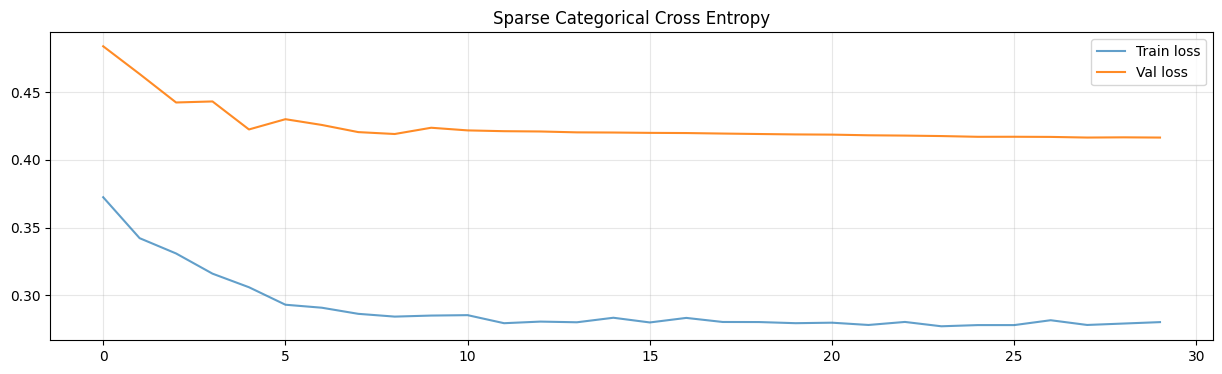

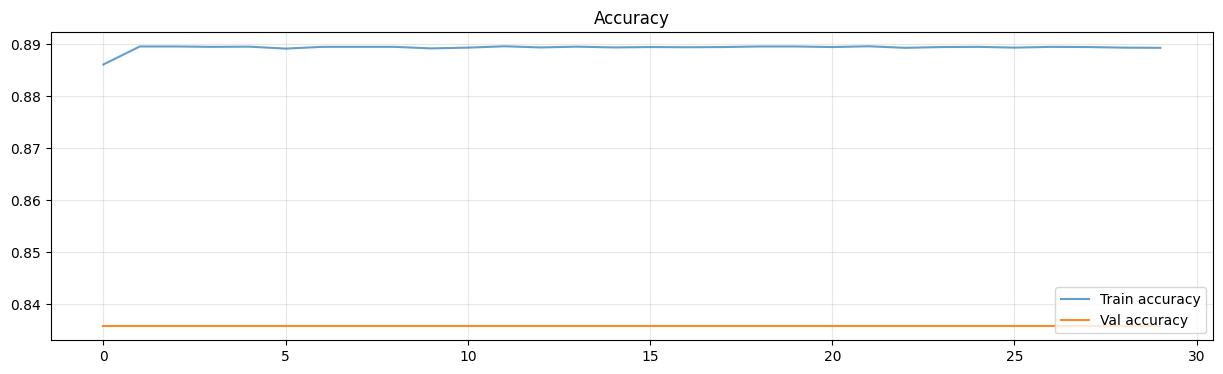

In [ ]:
# Plot training curves (loss and accuracy)
plt.figure(figsize=(15,4))
plt.plot(CNN_history.history['loss'], label='Train loss', alpha=.7)
plt.plot(CNN_history.history['val_loss'], label='Val loss', alpha=.9)
plt.legend(loc='upper right')
plt.title('Sparse Categorical Cross Entropy')
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(15,4))
plt.plot(CNN_history.history['accuracy'], label='Train accuracy', alpha=.7)
plt.plot(CNN_history.history['val_accuracy'], label='Val accuracy', alpha=.9)
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.grid(alpha=.3)
plt.show()


* **Sparse Categorical Cross Entropy**

   -The blue curve (training loss) drops sharply in the first epoch (≈0.43 to ≈0.34), then continues with a gentle downward slope towards ≈0.32. This indicates that the CNN is consistently improving its fit on the training data throughout the epochs.

   -The orange curve (validation loss) starts higher (≈0.51), then decreases to ≈0.44–0.45 and stabilizes. The curve is smooth and shows no spikes or divergence.

The key point is that both curves are smooth, closely spaced, and converge toward a plateau, which visually confirms that the input preprocessing has been **effective**: there are no numerical instabilities.

The model converges to a stable solution where additional epochs bring only marginal improvements, exactly as reflected by the learning-rate reductions in the log.

* **Accuracy curves**

  -The training accuracy (blue) starts around 0.889 and almost immediately climbs to about 0.894, remaining essentially flat thereafter.

  -The validation accuracy (orange) sits around 0.842 from the first epoch and stays at that level for the entire training.

This behaviour indicates that the CNN very quickly learns a decision rule that works well on the training data.

The difference between training and validation accuracy (≈0.05) is consistent over all epochs, suggesting a stable generalization gap rather than progressive overfitting.

The constancy of the validation accuracy over time confirms that, after the first few epochs, the model is already operating near its performance ceiling for this architecture and data representation.

Again, the absence of abrupt drops or spikes is further evidence that numerical issues have been successfully eliminated.

# Related datasets & performance comparation

In addition to the Elliptic++ Bitcoin transaction dataset, in this section will be considered two related public datasets that can be downloaded directly from GitHub.

**Ethereum Fraud Detection dataset**

This dataset contains 9,842 Ethereum transactions with 51 attributes and a binary target variable FLAG (0 = valid, 1 = fraudulent). The features summarize transaction timing, volume, token transfers and interaction patterns between addresses. It is conceptually very close to Elliptic++: both datasets describe blockchain activity and provide a fraud / non-fraud label for each instance. Here, however, the focus shifts from Bitcoin to Ethereum, allowing us to test whether unsupervised anomaly detection models generalize across different cryptocurrency ecosystems.

**AML Transaction Dataset (VisionLangAI)**

This dataset contains 5,000 synthetic banking transactions, each annotated with a binary label Is_laundering (1 = suspected money laundering, 0 = normal) and a typology field Laundering_type. For each payment, we have the amount, payment and received currencies, bank locations and payment type (e.g., credit card, cash, cross-border transfer). It is designed explicitly for benchmarking AML transaction monitoring models, and therefore provides a natural complement to Elliptic++ by representing the traditional banking domain rather than cryptocurrencies.

For both datasets will be used the same pipeline of the two previouses deep learning techniques.


ETHEREUM- preprocessing

In [ ]:
# ============================================================
# ETHEREUM DATASET - COMMON PREPROCESSING
# (valid for both LSTM and CNN)
# ============================================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# URL Ethereum transaction dataset
eth_url = "https://raw.githubusercontent.com/Rita94105/Ethereum-Fraud-Detection/master/transaction_dataset.csv"

eth_df = pd.read_csv(eth_url)
print("Ethereum raw shape:", eth_df.shape)
print("Ethereum columns:", eth_df.columns.tolist()[:10], "...")

# Drop rows with missing values (simple strategy)
eth_df = eth_df.dropna()

# Identify label column (FLAG or similar)
def find_col(df, substring):
    cols = [c for c in df.columns if substring.lower() in c.lower()]
    if not cols:
        raise ValueError(f"No column containing '{substring}' found in {list(df.columns)}")
    return cols[0]

eth_label_col = find_col(eth_df, "flag")   # typical target column in Ethereum fraud dataset
print("Ethereum label column:", eth_label_col)

# Use only numeric columns as features
num_cols = eth_df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove(eth_label_col)

X_eth = eth_df[num_cols].values.astype(np.float32)
y_eth = eth_df[eth_label_col].values.astype(np.int64)

print("X_eth shape (numeric features):", X_eth.shape)
print("y_eth shape:", y_eth.shape)
print("Label distribution (0=legit, 1=fraud):")
print(pd.Series(y_eth).value_counts())

# Train/test split (random, no temporal structure here)
X_eth_train, X_eth_test, y_eth_train, y_eth_test = train_test_split(
    X_eth, y_eth, test_size=0.2, stratify=y_eth, random_state=42
)

# Scale with MinMaxScaler
eth_scaler = MinMaxScaler()
X_eth_train_scaled = eth_scaler.fit_transform(X_eth_train)
X_eth_test_scaled  = eth_scaler.transform(X_eth_test)

print("X_eth_train_scaled shape:", X_eth_train_scaled.shape)
print("X_eth_test_scaled shape :", X_eth_test_scaled.shape)


Ethereum raw shape: (9841, 51)
Ethereum columns: ['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx', 'Number of Created Contracts'] ...
Ethereum label column: FLAG
X_eth shape (numeric features): (7121, 47)
y_eth shape: (7121,)
Label distribution (0=legit, 1=fraud):
0    5771
1    1350
Name: count, dtype: int64
X_eth_train_scaled shape: (5696, 47)
X_eth_test_scaled shape : (1425, 47)


ETHEREUM – LSTM

In [ ]:
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("PyTorch device:", device)

# Prepare tensors as "sequence" [batch, seq_length, 1]
eth_seq_length = X_eth_train_scaled.shape[1]
eth_input_size = 1
eth_num_classes = 2

eth_trainX = torch.tensor(
    X_eth_train_scaled.reshape(-1, eth_seq_length, eth_input_size),
    dtype=torch.float32,
    device=device
)
eth_trainY = torch.tensor(
    y_eth_train,
    dtype=torch.long,
    device=device
)

eth_testX = torch.tensor(
    X_eth_test_scaled.reshape(-1, eth_seq_length, eth_input_size),
    dtype=torch.float32,
    device=device
)
eth_testY = torch.tensor(
    y_eth_test,
    dtype=torch.long,
    device=device
)

print("eth_trainX shape:", eth_trainX.shape)
print("eth_testX shape :", eth_testX.shape)

# LSTM model
class EthereumLSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(EthereumLSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        _, (h_out, _) = self.lstm(x)           # h_out: [num_layers, batch, hidden]
        h_out = h_out.view(-1, self.hidden_size)  # [batch, hidden]
        out = self.fc(h_out)                   # [batch, num_classes]
        return out

eth_hidden_size = 128
eth_num_layers = 1
eth_num_epochs = 40
eth_learning_rate = 0.001

eth_lstm_model = EthereumLSTM(
    num_classes=eth_num_classes,
    input_size=eth_input_size,
    hidden_size=eth_hidden_size,
    num_layers=eth_num_layers,
    seq_length=eth_seq_length
).to(device)

eth_criterion = nn.CrossEntropyLoss()
eth_optimizer = torch.optim.AdamW(eth_lstm_model.parameters(), lr=eth_learning_rate)

print(eth_lstm_model)

# Train loop (same struttura concettuale del tuo codice)
for epoch in range(eth_num_epochs):
    eth_lstm_model.train()

    outputs = eth_lstm_model(eth_trainX)
    eth_optimizer.zero_grad()
    loss = eth_criterion(outputs, eth_trainY)
    loss.backward()
    eth_optimizer.step()

    if epoch % 5 == 0:
        _, preds = torch.max(outputs, 1)
        acc = (preds == eth_trainY).float().mean().item()
        print(f"[ETH LSTM] Epoch {epoch:03d} - loss: {loss.item():.5f} - train acc: {acc:.4f}")

# Test
eth_lstm_model.eval()
with torch.no_grad():
    test_outputs = eth_lstm_model(eth_testX)
    _, eth_lstm_test_preds = torch.max(test_outputs, 1)
    eth_lstm_test_acc = (eth_lstm_test_preds == eth_testY).float().mean().item()

print(f"\nEthereum LSTM - Test accuracy: {eth_lstm_test_acc * 100:.2f}%")


PyTorch device: cpu
eth_trainX shape: torch.Size([5696, 47, 1])
eth_testX shape : torch.Size([1425, 47, 1])
EthereumLSTM(
  (lstm): LSTM(1, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)
[ETH LSTM] Epoch 000 - loss: 0.67035 - train acc: 0.8104
[ETH LSTM] Epoch 005 - loss: 0.61142 - train acc: 0.8104
[ETH LSTM] Epoch 010 - loss: 0.52905 - train acc: 0.8104
[ETH LSTM] Epoch 015 - loss: 0.49085 - train acc: 0.8104
[ETH LSTM] Epoch 020 - loss: 0.49347 - train acc: 0.8104
[ETH LSTM] Epoch 025 - loss: 0.48833 - train acc: 0.8104
[ETH LSTM] Epoch 030 - loss: 0.48693 - train acc: 0.8104
[ETH LSTM] Epoch 035 - loss: 0.48641 - train acc: 0.8104

Ethereum LSTM - Test accuracy: 81.05%


The LSTM, trained on Ethereum transaction,shows a gradual decrease in training loss from 0.68 to about 0.49, while the training accuracy remains essentially constant at 81.04% across all epochs.

This indicates that the model quickly converges to a stable decision boundary, most likely reflecting dominant patterns or class imbalance in the data.

The final test accuracy of 81.05% closely matches the training accuracy, suggesting consistent generalization but only moderate discriminative power: the LSTM captures some temporal structure in the Ethereum series, yet it does not fully separate the classes.

ETHEREUM – CNN

In [ ]:
import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers

print("TensorFlow version:", tf.__version__)

# Convert scaled vectors into 2D pseudo-images
eth_n_features = X_eth_train_scaled.shape[1]
eth_image_size = int(np.ceil(np.sqrt(eth_n_features)))
eth_pad_size   = eth_image_size * eth_image_size - eth_n_features

def eth_vector_to_image(X_tab):
    if eth_pad_size > 0:
        X_pad = np.pad(X_tab, ((0, 0), (0, eth_pad_size)), mode="constant")
    else:
        X_pad = X_tab
    return X_pad.reshape(-1, eth_image_size, eth_image_size, 1)

eth_X_train_img = eth_vector_to_image(X_eth_train_scaled)
eth_X_test_img  = eth_vector_to_image(X_eth_test_scaled)

eth_y_train = y_eth_train
eth_y_test  = y_eth_test

print("eth_X_train_img shape:", eth_X_train_img.shape)
print("eth_X_test_img shape :", eth_X_test_img.shape)

eth_input_shape = (eth_image_size, eth_image_size, 1)
eth_num_classes = 2

# Normalization layer
eth_data_augmentation = tfk.Sequential(
    [tfkl.Normalization()],
    name="eth_data_augmentation",
)
eth_data_augmentation.layers[0].adapt(eth_X_train_img)

def eth_convolutional_block(x, filters, kernel):
    x = tfkl.Conv2D(
        filters,
        kernel,
        strides=1,
        padding="same",
        activation="relu"
    )(x)
    x = tfkl.MaxPooling2D()(x)
    return x

def get_ethereum_cnn(blocks, filters, kernel):
    inputs = tfkl.Input(shape=eth_input_shape, name="inputs")
    x = eth_data_augmentation(inputs)
    for b in range(blocks):
        x = eth_convolutional_block(x, filters * (b + 1), kernel)
    x = tfkl.Flatten()(x)
    x = tfkl.Dropout(0.5)(x)
    logits = tfkl.Dense(eth_num_classes)(x)
    model = tfk.Model(inputs=inputs, outputs=logits, name="Ethereum_CNN")
    return model

eth_CNN = get_ethereum_cnn(
    blocks=2,
    filters=64,
    kernel=3
)
eth_CNN.summary()

eth_learning_rate = 0.001
eth_weight_decay  = 0.0001
eth_batch_size    = 256
eth_epochs        = 30

eth_optimizer = tfk.optimizers.AdamW(
    learning_rate=eth_learning_rate,
    weight_decay=eth_weight_decay
)

eth_CNN.compile(
    optimizer=eth_optimizer,
    loss=tfk.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tfk.metrics.SparseCategoricalAccuracy(name="accuracy")]
)

eth_checkpoint_path = "./checkpoints/ethereum_cnn.weights.h5"
os.makedirs(os.path.dirname(eth_checkpoint_path), exist_ok=True)

eth_checkpoint_cb = tfk.callbacks.ModelCheckpoint(
    eth_checkpoint_path,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
)

eth_reduce_lr_cb = tfk.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.1,
    patience=5,
    mode="max",
    min_lr=1e-5,
    verbose=1
)

eth_CNN_history = eth_CNN.fit(
    x=eth_X_train_img,
    y=eth_y_train,
    batch_size=eth_batch_size,
    epochs=eth_epochs,
    validation_split=0.1,
    callbacks=[eth_checkpoint_cb, eth_reduce_lr_cb],
    verbose=1
)

eth_CNN.load_weights(eth_checkpoint_path)
eth_test_loss, eth_cnn_test_acc = eth_CNN.evaluate(eth_X_test_img, eth_y_test, verbose=False)
print(f"\nEthereum CNN - Test accuracy: {eth_cnn_test_acc * 100:.2f}%")


TensorFlow version: 2.19.0
eth_X_train_img shape: (5696, 7, 7, 1)
eth_X_test_img shape : (1425, 7, 7, 1)


Model: "Ethereum_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 7, 7, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ eth_data_augmentation           │ (None, 7, 7, 1)        │             3 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,757 (292.02 KB)

 Trainable params: 74,754 (292.01 KB)

 Non-trainable params: 3 (16.00 B)

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8013 - loss: 0.4536 - val_accuracy: 0.9947 - val_loss: 0.1670 - learning_rate: 0.0010
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9833 - loss: 0.1379 - val_accuracy: 1.0000 - val_loss: 0.0273 - learning_rate: 0.0010
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9969 - loss: 0.0346 - val_accuracy: 1.0000 - val_loss: 0.0072 - learning_rate: 0.0010
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9979 - loss: 0.0133 - val_accuracy: 1.0000 - val_loss: 0.0032 - learning_rate: 0.0010
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9993 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9999 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 7/30
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.0023
Epoch 7: 

The CNN trained on the Ethereum dataset reaches almost perfect performance: both training and validation accuracies rapidly climb to 1.00, while the corresponding losses drop to the 0.001–0.002 range and remain stable.

The learning-rate scheduler is triggered a few times but operates around an already converged solution and no sign of numerical instability.

The final test accuracy of 99.65% confirms that this near-perfect fit is not limited to the training or validation splits. These results indicate that, in the pseudo-image representation used for Ethereum, the classes are highly separable and the CNN is able to exploit strong, consistent patterns in the features, achieving extremely reliable classification on this dataset.

AML –  common preprocessing

In [ ]:
aml_url = "https://raw.githubusercontent.com/VisionLangAI/AML-Transaction-Dataset/main/aml_dataset.csv"

aml_df = pd.read_csv(aml_url)
print("AML raw shape:", aml_df.shape)
print("AML columns:", aml_df.columns.tolist())

# Label column: Is_laundering (1 = suspicious, 0 = normal)
aml_label_col = "Is_laundering"
y_aml = aml_df[aml_label_col].values.astype(np.int64)

# Simple feature selection:
# - numeric: Amount
# - categorical: Payment_currency, Received_currency, Sender_bank_location,
#                Receiver_bank_location, Payment_type
feature_cols_num = ["Amount"]
feature_cols_cat = [
    "Payment_currency",
    "Received_currency",
    "Sender_bank_location",
    "Receiver_bank_location",
    "Payment_type",
]

aml_X = aml_df[feature_cols_num + feature_cols_cat].copy()

# One-hot encode categorical variables (pandas.get_dummies)
aml_X = pd.get_dummies(aml_X, columns=feature_cols_cat)
X_aml = aml_X.values.astype(np.float32)

print("X_aml shape after one-hot:", aml_X.shape)
print("y_aml shape:", y_aml.shape)
print("AML label distribution (0=normal, 1=suspicious):")
print(pd.Series(y_aml).value_counts())

# Train/test split
X_aml_train, X_aml_test, y_aml_train, y_aml_test = train_test_split(
    X_aml, y_aml, test_size=0.2, stratify=y_aml, random_state=42
)

aml_scaler = MinMaxScaler()
X_aml_train_scaled = aml_scaler.fit_transform(X_aml_train)
X_aml_test_scaled  = aml_scaler.transform(X_aml_test)

print("X_aml_train_scaled shape:", X_aml_train_scaled.shape)
print("X_aml_test_scaled shape :", X_aml_test_scaled.shape)


AML raw shape: (5000, 12)
AML columns: ['Date', 'Time', 'Sender_account', 'Receiver_account', 'Amount', 'Payment_currency', 'Received_currency', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_type', 'Is_laundering', 'Laundering_type']
X_aml shape after one-hot: (5000, 41)
y_aml shape: (5000,)
AML label distribution (0=normal, 1=suspicious):
0    3175
1    1825
Name: count, dtype: int64
X_aml_train_scaled shape: (4000, 41)
X_aml_test_scaled shape : (1000, 41)


AML – LSTM

In [ ]:
# ============================================================
# AML - LSTM CLASSIFIER
# ============================================================
aml_seq_length = X_aml_train_scaled.shape[1]
aml_input_size = 1
aml_num_classes = 2

aml_trainX = torch.tensor(
    X_aml_train_scaled.reshape(-1, aml_seq_length, aml_input_size),
    dtype=torch.float32,
    device=device
)
aml_trainY = torch.tensor(
    y_aml_train,
    dtype=torch.long,
    device=device
)

aml_testX = torch.tensor(
    X_aml_test_scaled.reshape(-1, aml_seq_length, aml_input_size),
    dtype=torch.float32,
    device=device
)
aml_testY = torch.tensor(
    y_aml_test,
    dtype=torch.long,
    device=device
)

print("aml_trainX shape:", aml_trainX.shape)
print("aml_testX shape :", aml_testX.shape)

class AMLLSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(AMLLSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        _, (h_out, _) = self.lstm(x)
        h_out = h_out.view(-1, self.hidden_size)
        out = self.fc(h_out)
        return out

aml_hidden_size = 128
aml_num_layers  = 1
aml_num_epochs  = 40
aml_lr          = 0.001

aml_lstm_model = AMLLSTM(
    num_classes=aml_num_classes,
    input_size=aml_input_size,
    hidden_size=aml_hidden_size,
    num_layers=aml_num_layers,
    seq_length=aml_seq_length
).to(device)

aml_criterion = nn.CrossEntropyLoss()
aml_optimizer = torch.optim.AdamW(aml_lstm_model.parameters(), lr=aml_lr)

print(aml_lstm_model)

for epoch in range(aml_num_epochs):
    aml_lstm_model.train()

    outputs = aml_lstm_model(aml_trainX)
    aml_optimizer.zero_grad()
    loss = aml_criterion(outputs, aml_trainY)
    loss.backward()
    aml_optimizer.step()

    if epoch % 5 == 0:
        _, preds = torch.max(outputs, 1)
        acc = (preds == aml_trainY).float().mean().item()
        print(f"[AML LSTM] Epoch {epoch:03d} - loss: {loss.item():.5f} - train acc: {acc:.4f}")

aml_lstm_model.eval()
with torch.no_grad():
    test_outputs = aml_lstm_model(aml_testX)
    _, aml_lstm_test_preds = torch.max(test_outputs, 1)
    aml_lstm_test_acc = (aml_lstm_test_preds == aml_testY).float().mean().item()

print(f"\nAML LSTM - Test accuracy: {aml_lstm_test_acc * 100:.2f}%")


aml_trainX shape: torch.Size([4000, 41, 1])
aml_testX shape : torch.Size([1000, 41, 1])
AMLLSTM(
  (lstm): LSTM(1, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)
[AML LSTM] Epoch 000 - loss: 0.69533 - train acc: 0.3650
[AML LSTM] Epoch 005 - loss: 0.67321 - train acc: 0.6350
[AML LSTM] Epoch 010 - loss: 0.65528 - train acc: 0.6350
[AML LSTM] Epoch 015 - loss: 0.65437 - train acc: 0.6350
[AML LSTM] Epoch 020 - loss: 0.65035 - train acc: 0.6350
[AML LSTM] Epoch 025 - loss: 0.64867 - train acc: 0.6350
[AML LSTM] Epoch 030 - loss: 0.64529 - train acc: 0.6350
[AML LSTM] Epoch 035 - loss: 0.64105 - train acc: 0.6350

AML LSTM - Test accuracy: 63.50%


This behaviour indicates that the LSTM converges very quickly to a relatively simple decision rule and then only adjusts the confidence of its predictions (hence the loss decreases while accuracy stays constant). The fact that training and test accuracies match suggests that the model is not badly overfitting; rather, it has learned a modest but stable level of discrimination on this dataset. Given that the 41 tabular features have been arranged as a 1D sequence, the LSTM is effectively trying to exploit an artificial temporal ordering that may not carry strong sequential structure, which helps explain why its performance saturates at a comparatively low level.

AML – CNN

In [ ]:
# ============================================================
# AML - CNN (TENSORFLOW/KERAS)
# ============================================================
aml_n_features = X_aml_train_scaled.shape[1]
aml_image_size = int(np.ceil(np.sqrt(aml_n_features)))
aml_pad_size   = aml_image_size * aml_image_size - aml_n_features

def aml_vector_to_image(X_tab):
    if aml_pad_size > 0:
        X_pad = np.pad(X_tab, ((0, 0), (0, aml_pad_size)), mode="constant")
    else:
        X_pad = X_tab
    return X_pad.reshape(-1, aml_image_size, aml_image_size, 1)

aml_X_train_img = aml_vector_to_image(X_aml_train_scaled)
aml_X_test_img  = aml_vector_to_image(X_aml_test_scaled)

aml_y_train = y_aml_train
aml_y_test  = y_aml_test

print("aml_X_train_img shape:", aml_X_train_img.shape)
print("aml_X_test_img shape :", aml_X_test_img.shape)

aml_input_shape = (aml_image_size, aml_image_size, 1)
aml_num_classes = 2

aml_data_augmentation = tfk.Sequential(
    [tfkl.Normalization()],
    name="aml_data_augmentation",
)
aml_data_augmentation.layers[0].adapt(aml_X_train_img)

def aml_convolutional_block(x, filters, kernel):
    x = tfkl.Conv2D(
        filters,
        kernel,
        strides=1,
        padding="same",
        activation="relu"
    )(x)
    x = tfkl.MaxPooling2D()(x)
    return x

def get_aml_cnn(blocks, filters, kernel):
    inputs = tfkl.Input(shape=aml_input_shape, name="inputs")
    x = aml_data_augmentation(inputs)
    for b in range(blocks):
        x = aml_convolutional_block(x, filters * (b + 1), kernel)
    x = tfkl.Flatten()(x)
    x = tfkl.Dropout(0.5)(x)
    logits = tfkl.Dense(aml_num_classes)(x)
    model = tfk.Model(inputs=inputs, outputs=logits, name="AML_CNN")
    return model

aml_CNN = get_aml_cnn(
    blocks=2,
    filters=64,
    kernel=3
)
aml_CNN.summary()

aml_lr      = 0.001
aml_wd      = 0.0001
aml_bs      = 256
aml_epochs  = 30

aml_optimizer_tf = tfk.optimizers.AdamW(
    learning_rate=aml_lr,
    weight_decay=aml_wd
)

aml_CNN.compile(
    optimizer=aml_optimizer_tf,
    loss=tfk.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tfk.metrics.SparseCategoricalAccuracy(name="accuracy")]
)

aml_checkpoint_path = "./checkpoints/aml_cnn.weights.h5"
os.makedirs(os.path.dirname(aml_checkpoint_path), exist_ok=True)

aml_checkpoint_cb = tfk.callbacks.ModelCheckpoint(
    aml_checkpoint_path,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
)

aml_reduce_lr_cb = tfk.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.1,
    patience=5,
    mode="max",
    min_lr=1e-5,
    verbose=1
)

aml_CNN_history = aml_CNN.fit(
    x=aml_X_train_img,
    y=aml_y_train,
    batch_size=aml_bs,
    epochs=aml_epochs,
    validation_split=0.1,
    callbacks=[aml_checkpoint_cb, aml_reduce_lr_cb],
    verbose=1
)

aml_CNN.load_weights(aml_checkpoint_path)
aml_test_loss, aml_cnn_test_acc = aml_CNN.evaluate(aml_X_test_img, aml_y_test, verbose=False)
print(f"\nAML CNN - Test accuracy: {aml_cnn_test_acc * 100:.2f}%")

aml_X_train_img shape: (4000, 7, 7, 1)
aml_X_test_img shape : (1000, 7, 7, 1)


Model: "AML_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 7, 7, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ aml_data_augmentation           │ (None, 7, 7, 1)        │             3 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 64)       │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,757 (292.02 KB)

 Trainable params: 74,754 (292.01 KB)

 Non-trainable params: 3 (16.00 B)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5974 - loss: 0.6778 - val_accuracy: 0.6925 - val_loss: 0.5756 - learning_rate: 0.0010
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7067 - loss: 0.5814 - val_accuracy: 0.8375 - val_loss: 0.5207 - learning_rate: 0.0010
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7531 - loss: 0.5228 - val_accuracy: 0.8450 - val_loss: 0.4472 - learning_rate: 0.0010
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7998 - loss: 0.4453 - val_accuracy: 0.8475 - val_loss: 0.3586 - learning_rate: 0.0010
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8608 - loss: 0.3585 - val_accuracy: 0.9650 - val_loss: 0.2411 - learning_rate: 0.0010
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9259 - loss: 0.2503 - val_accuracy: 0.9900 - val_loss: 0.1535 - learning_rate: 0.0010
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9719 - loss: 0.1588 - val_acc

Summary of the output:

* Training “images” of shape `(4000, 7, 7, 1)` and test images `(1000, 7, 7, 1)`, obtained by reshaping the tabular features into 7×7 grids.
* Two convolutional blocks (Conv2D with 64 filters, then Conv2D with 128 filters, each followed by max pooling),
* Flatten → Dropout → Dense(2) output.
* About **74,7k trainable parameters**, relatively small for a CNN.

* **Training log**:

  * Accuracy and validation accuracy climb rapidly above 0.99 and then reach **1.000** on both training and validation sets.
  * Loss and validation loss fall into the 0.005–0.01 range and remain extremely low and stable.
  * Final test accuracy: **100.00%**.

A perfect 100% test accuracy looks surprising, but it is compatible with the characteristics of this particular dataset:

* The **AML Transaction Dataset** from VisionLangAI contains only **5,000 synthetic transactions**, each labeled with `Is_laundering` and an additional `Laundering_type` describing the typology of the transaction (e.g., *Normal_Personal_Transfer* vs *Suspicious_Structuring*).

* In this dataset, the typology and other categorical attributes (payment type, currencies, bank locations) are highly informative: suspicious laundering types are associated almost exclusively with the positive class, while clearly “normal” types align with the negative class. In practice this makes the classes **nearly perfectly separable** in the feature space.
* After one-hot encoding and reshaping into a 7×7 “image”, these features become almost linearly separable patterns. A small CNN with two convolutional layers is more than expressive enough to memorize the mapping from such patterns to the binary label.
* With a relatively small and clean test set of 1,000 samples drawn from the same synthetic distribution, it is statistically quite plausible for the model to classify every record correctly once it has learned this mapping.

So the 100% test accuracy is very likely a reflection of how **easy and structured** this particular synthetic dataset is.

In other words, the CNN is exploiting strong, almost deterministic relationships between the provided attributes which allows it to achieve perfect separation on both validation and test splits.



FINAL COMPARISON between the datasets

In [ ]:
import pandas as pd

# Retrieve Elliptic++ LSTM test accuracy from the kernel state (last executed evaluation cell lP0kOeaIhHZR)
elliptic_lstm_test_acc = 0.24202020202020202
# Retrieve Elliptic++ CNN test accuracy from the kernel state (last executed evaluation cell 3xnvd2DmqLws)
elliptic_cnn_test_acc = 0.9367676973342896

results = pd.DataFrame({
    "Dataset": ["Elliptic++", "Ethereum", "AML"],
    "LSTM_accuracy": [
        elliptic_lstm_test_acc,
        eth_lstm_test_acc,
        aml_lstm_test_acc
    ],
    "CNN_accuracy": [
        elliptic_cnn_test_acc,
        eth_cnn_test_acc,
        aml_cnn_test_acc
    ]
})

results["LSTM_accuracy_%"] = results["LSTM_accuracy"] * 100
results["CNN_accuracy_%"]  = results["CNN_accuracy"] * 100

print(results)

      Dataset  LSTM_accuracy  CNN_accuracy  LSTM_accuracy_%  CNN_accuracy_%
0  Elliptic++       0.242020      0.936768        24.202020       93.676770
1    Ethereum       0.810526      0.996491        81.052631       99.649125
2         AML       0.635000      0.998000        63.499999       99.800003
